In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import statsmodels.formula.api as smf
from plotnine import *
pd.options.mode.chained_assignment = None
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:  # December to February
        return 'Winter'
ghg = gpd.read_file("../data/ghg_processed.geojson")

In [2]:
ghg = ghg.dropna(subset = ["co2_intensity", 'kwh'])
ghg = ghg.query("co2_intensity != 0")

In [3]:
colors =  ["#00a5bd", "#e6e6e6", "#f5d855", "#ff8e52", "#000000"]

In [4]:
ghg["bottom_quint_unit"] = pd.to_numeric(ghg["unit_co2_quintile"] == '5').astype(int)
ghg["top_quint_unit"] = pd.to_numeric(ghg["unit_co2_quintile"] == '1').astype(int)

In [5]:
ghg["bottom_quint"] = (ghg["efficiency_quintile"] == '5').astype(int)
ghg["top_quint"] = pd.to_numeric(ghg["efficiency_quintile"] == '1').astype(int)

In [6]:
ghg["efficiency_tertile"] = pd.qcut(ghg["co2_intensity"], 3, labels=False).astype(str)

In [7]:
# Define the correct order for your categories
ordered_categories = ['< 750', '750 - 1000', '1000 - 1250', '1250 - 2000', '2000 +']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['apt_size_cat'] = pd.Categorical(ghg['apt_size_cat'], categories=ordered_categories, ordered=True)

In [155]:
ghg['apt_size_cat_rev'] = pd.Categorical(ghg['apt_size_cat'], categories=ghg['apt_size_cat'].unique()[::-1], ordered=True)


In [8]:
# Define the correct order for your categories
ordered_categories = ['< 650', '650 - 1000', '1000 - 1250', '1250+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['apt_size_cat2'] = pd.Categorical(ghg['apt_size_cat2'], categories=ordered_categories, ordered=True)

In [9]:
# Define the correct order for your categories
ordered_categories = ['<30k', '30k-75k', '75k-125k', '125k-175k', '175k+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['income_bin'] = pd.Categorical(ghg['income_bin'], categories=ordered_categories, ordered=True)

In [10]:
# Define the correct order for your categories
ordered_categories = ["< 450", "450 - 600", "600 - 750", "750 - 1000", "1000 +"]


# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['sqft_bedroom_cat'] = pd.Categorical(ghg['sqft_bedroom_cat'], categories=ordered_categories, ordered=True)

In [11]:
# Define the correct order for your categories
ordered_categories = ['< 400', '400 - 600', '600 - 1000', '1000 - 1700', '1700 +']
bins = [-np.Inf, 400, 600, 1000, 1700, np.Inf]

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['price_sqft_cat'] = pd.cut(ghg['value_per_sqft'], bins = bins, labels = ordered_categories, ordered=True)

In [12]:
# Define the correct order for your categories
ordered_categories = ['Electricity', 'Natural Gas', 'District Steam', 'Fuel Oil', 'Unknown']

ghg["inferred_heating_method"] = pd.Categorical(ghg["inferred_heating_method"], categories=ordered_categories, ordered=True)


In [13]:
ghg["gas_per_sqft"] = (ghg['total_emissions'] * ghg['natural_gas_emissions_pct']) / ghg["total_fa"]

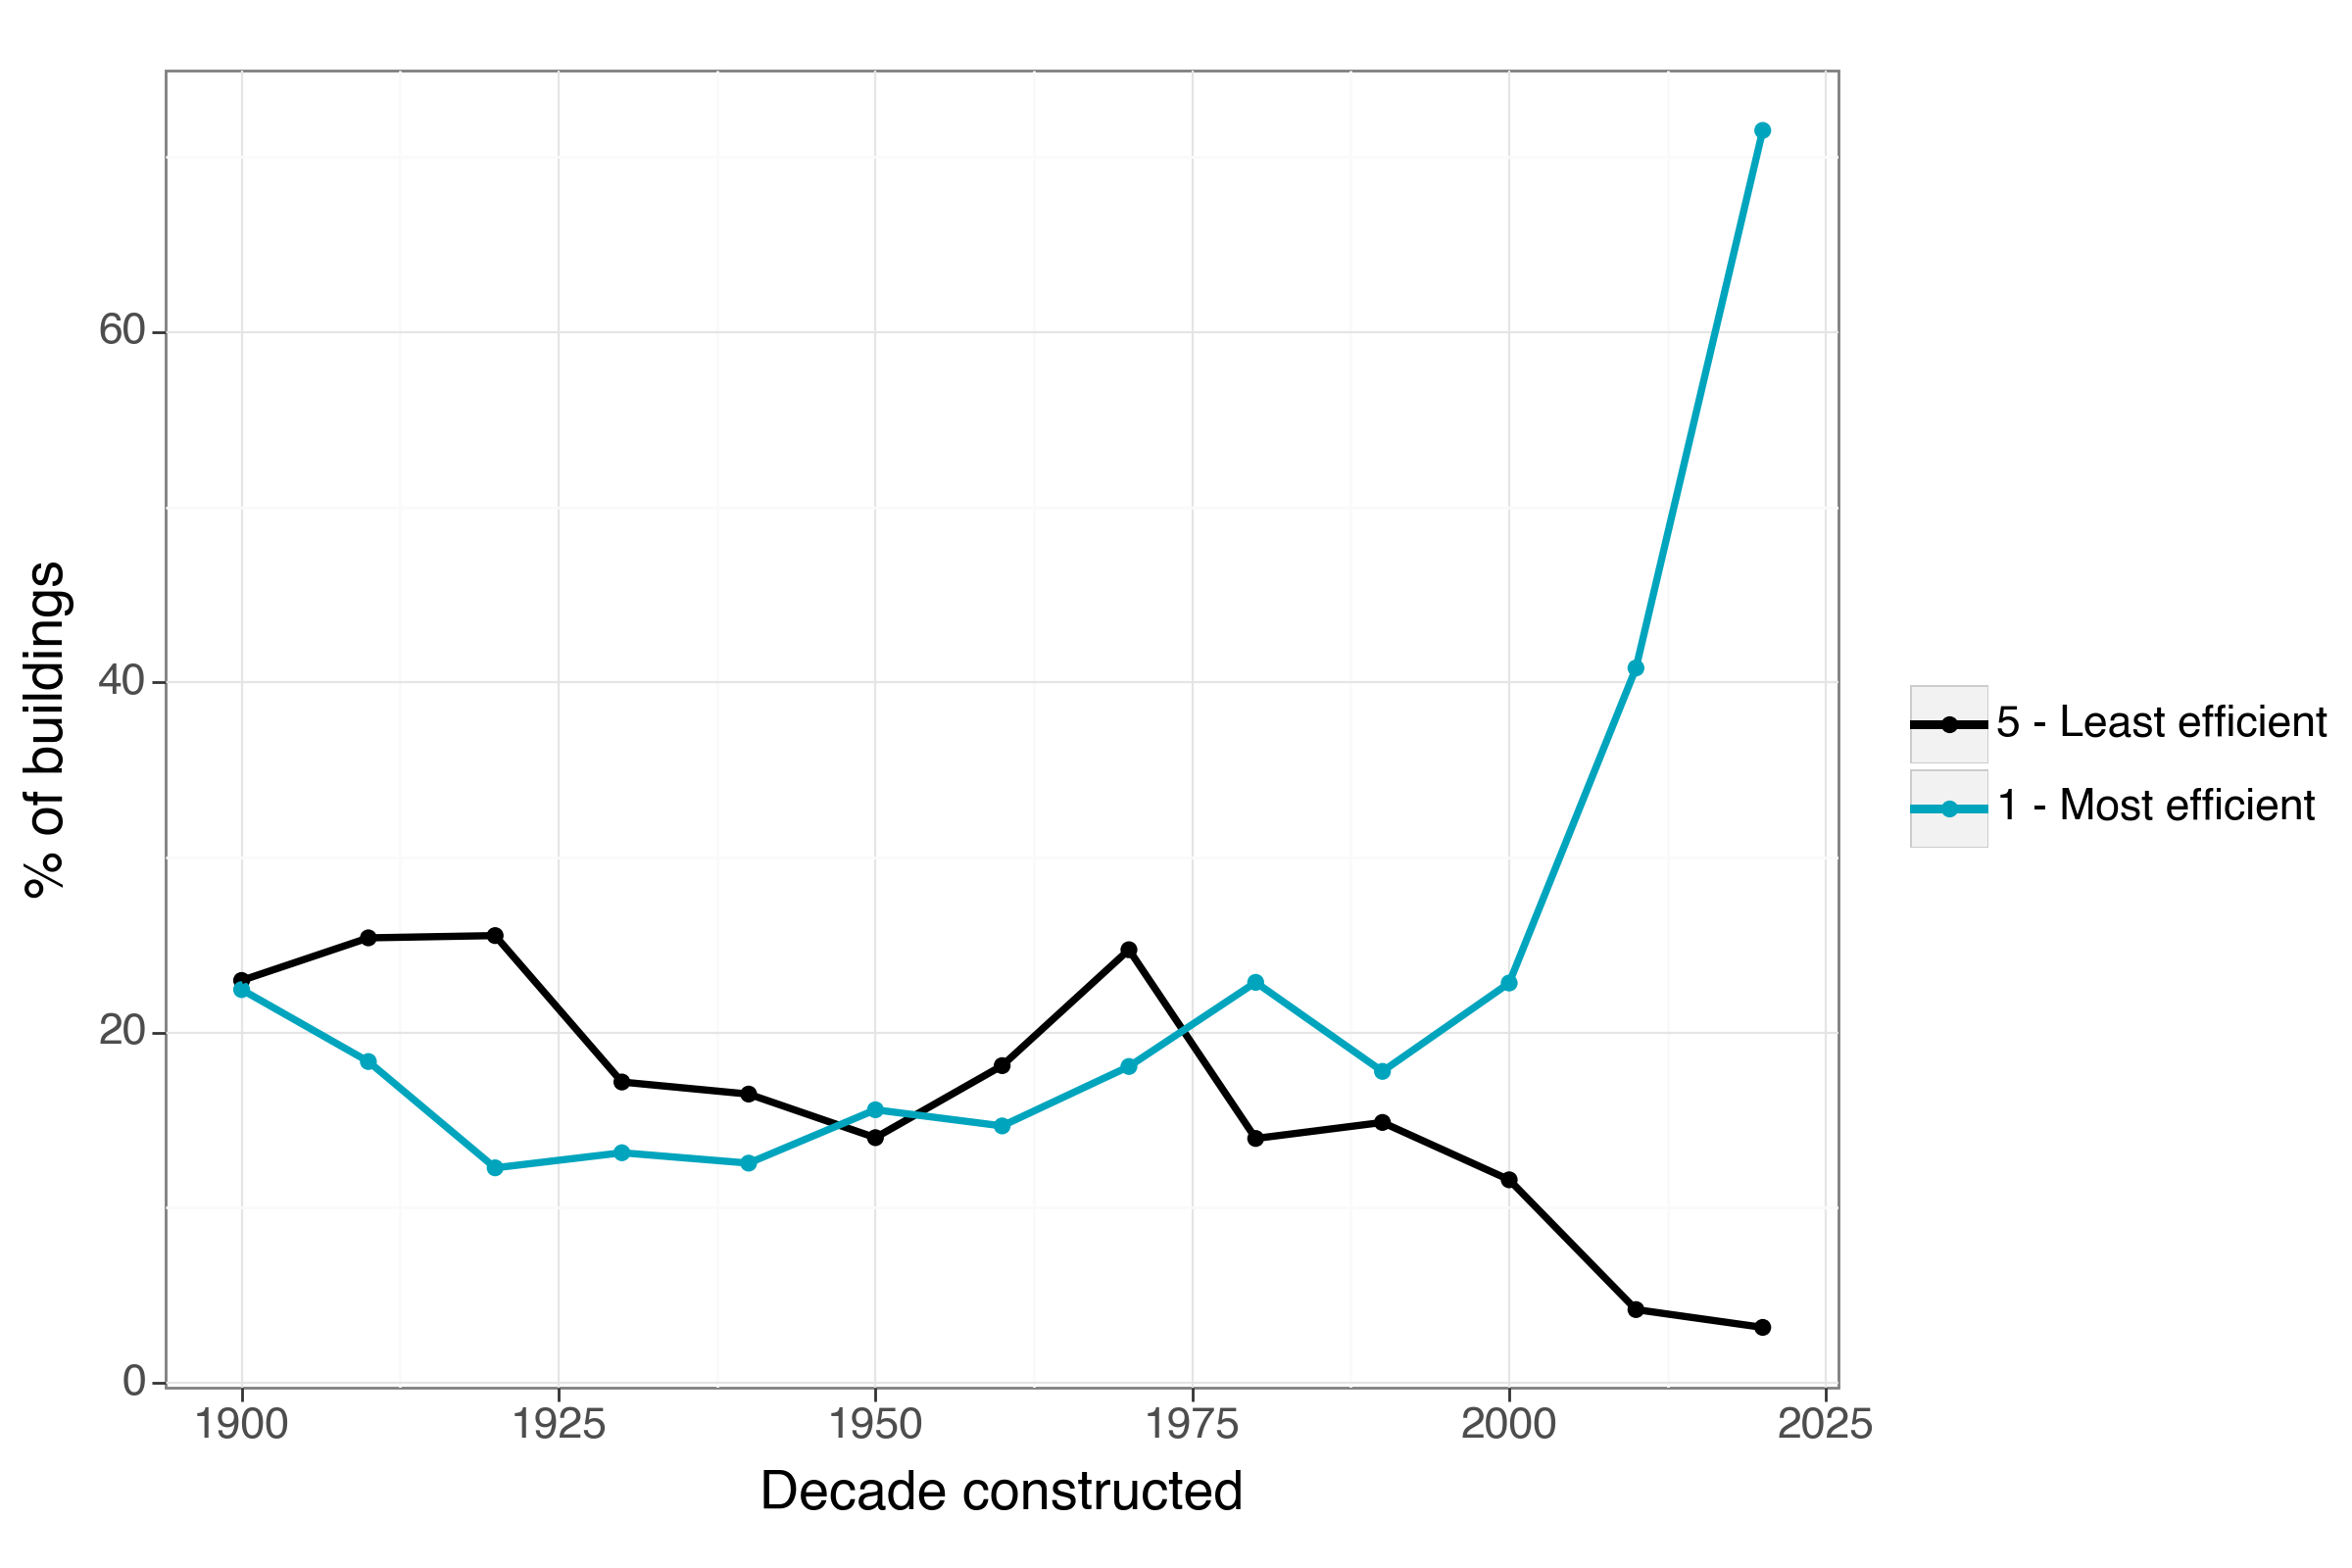

<Figure Size: (1200 x 800)>

In [150]:
plot_dat = ghg.query("year_built > 1900 & year_built < 2024").groupby("decade_built")[["bottom_quint", "top_quint"]].mean().reset_index().melt("decade_built")
plot_dat["value"] = plot_dat["value"] * 100
(ggplot(plot_dat, aes(x = "decade_built", y = "value",  group = "variable", color = "variable")) + 
 geom_point(size = 2.5) +
 geom_line(size =1.5) + 
 scale_color_manual(name = " ", values = [colors[4], colors[0]], labels = ["5 - Least efficient", "1 - Most efficient"]) +
 labs(y = "% of buildings", x = "Decade constructed") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

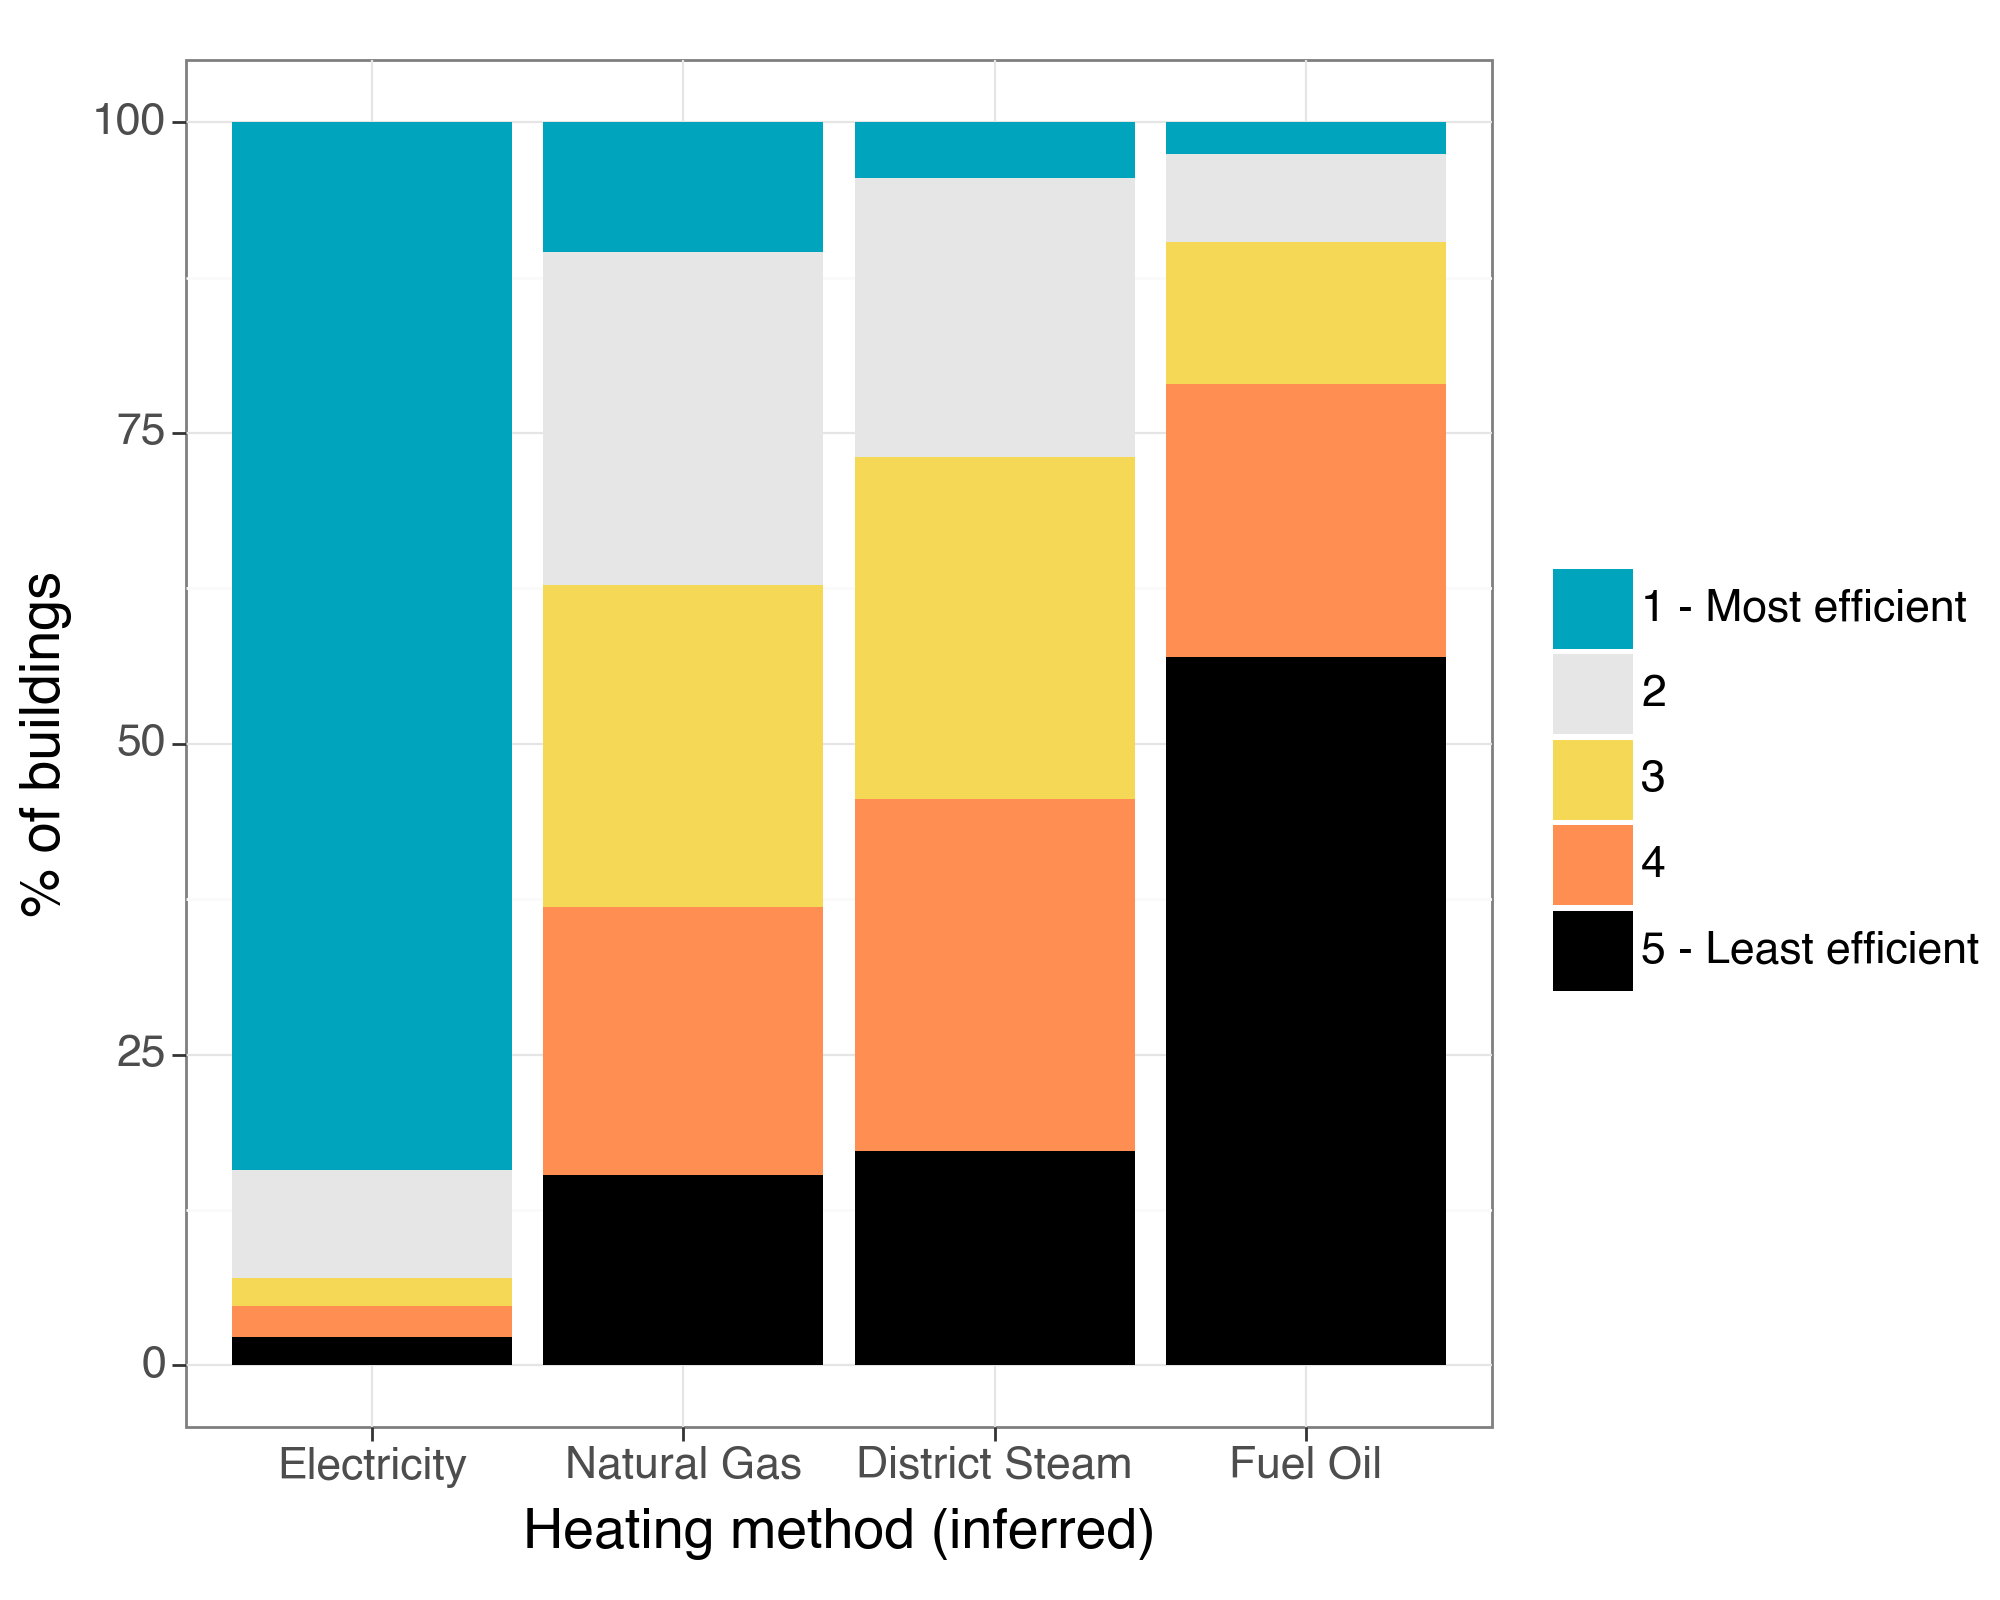

<Figure Size: (1000 x 800)>

In [149]:
(ggplot(ghg.query("inferred_heating_method != 'Unknown'"), aes(x = "inferred_heating_method", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "% of buildings", x = "Heating method (inferred)") +
 theme_bw(base_size= 20) +
 scale_y_continuous(labels=lambda l: ["{:.0f}".format(v * 100) for v in l]) +
 theme(figure_size=(10,8)))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 22 rows containing missing values.


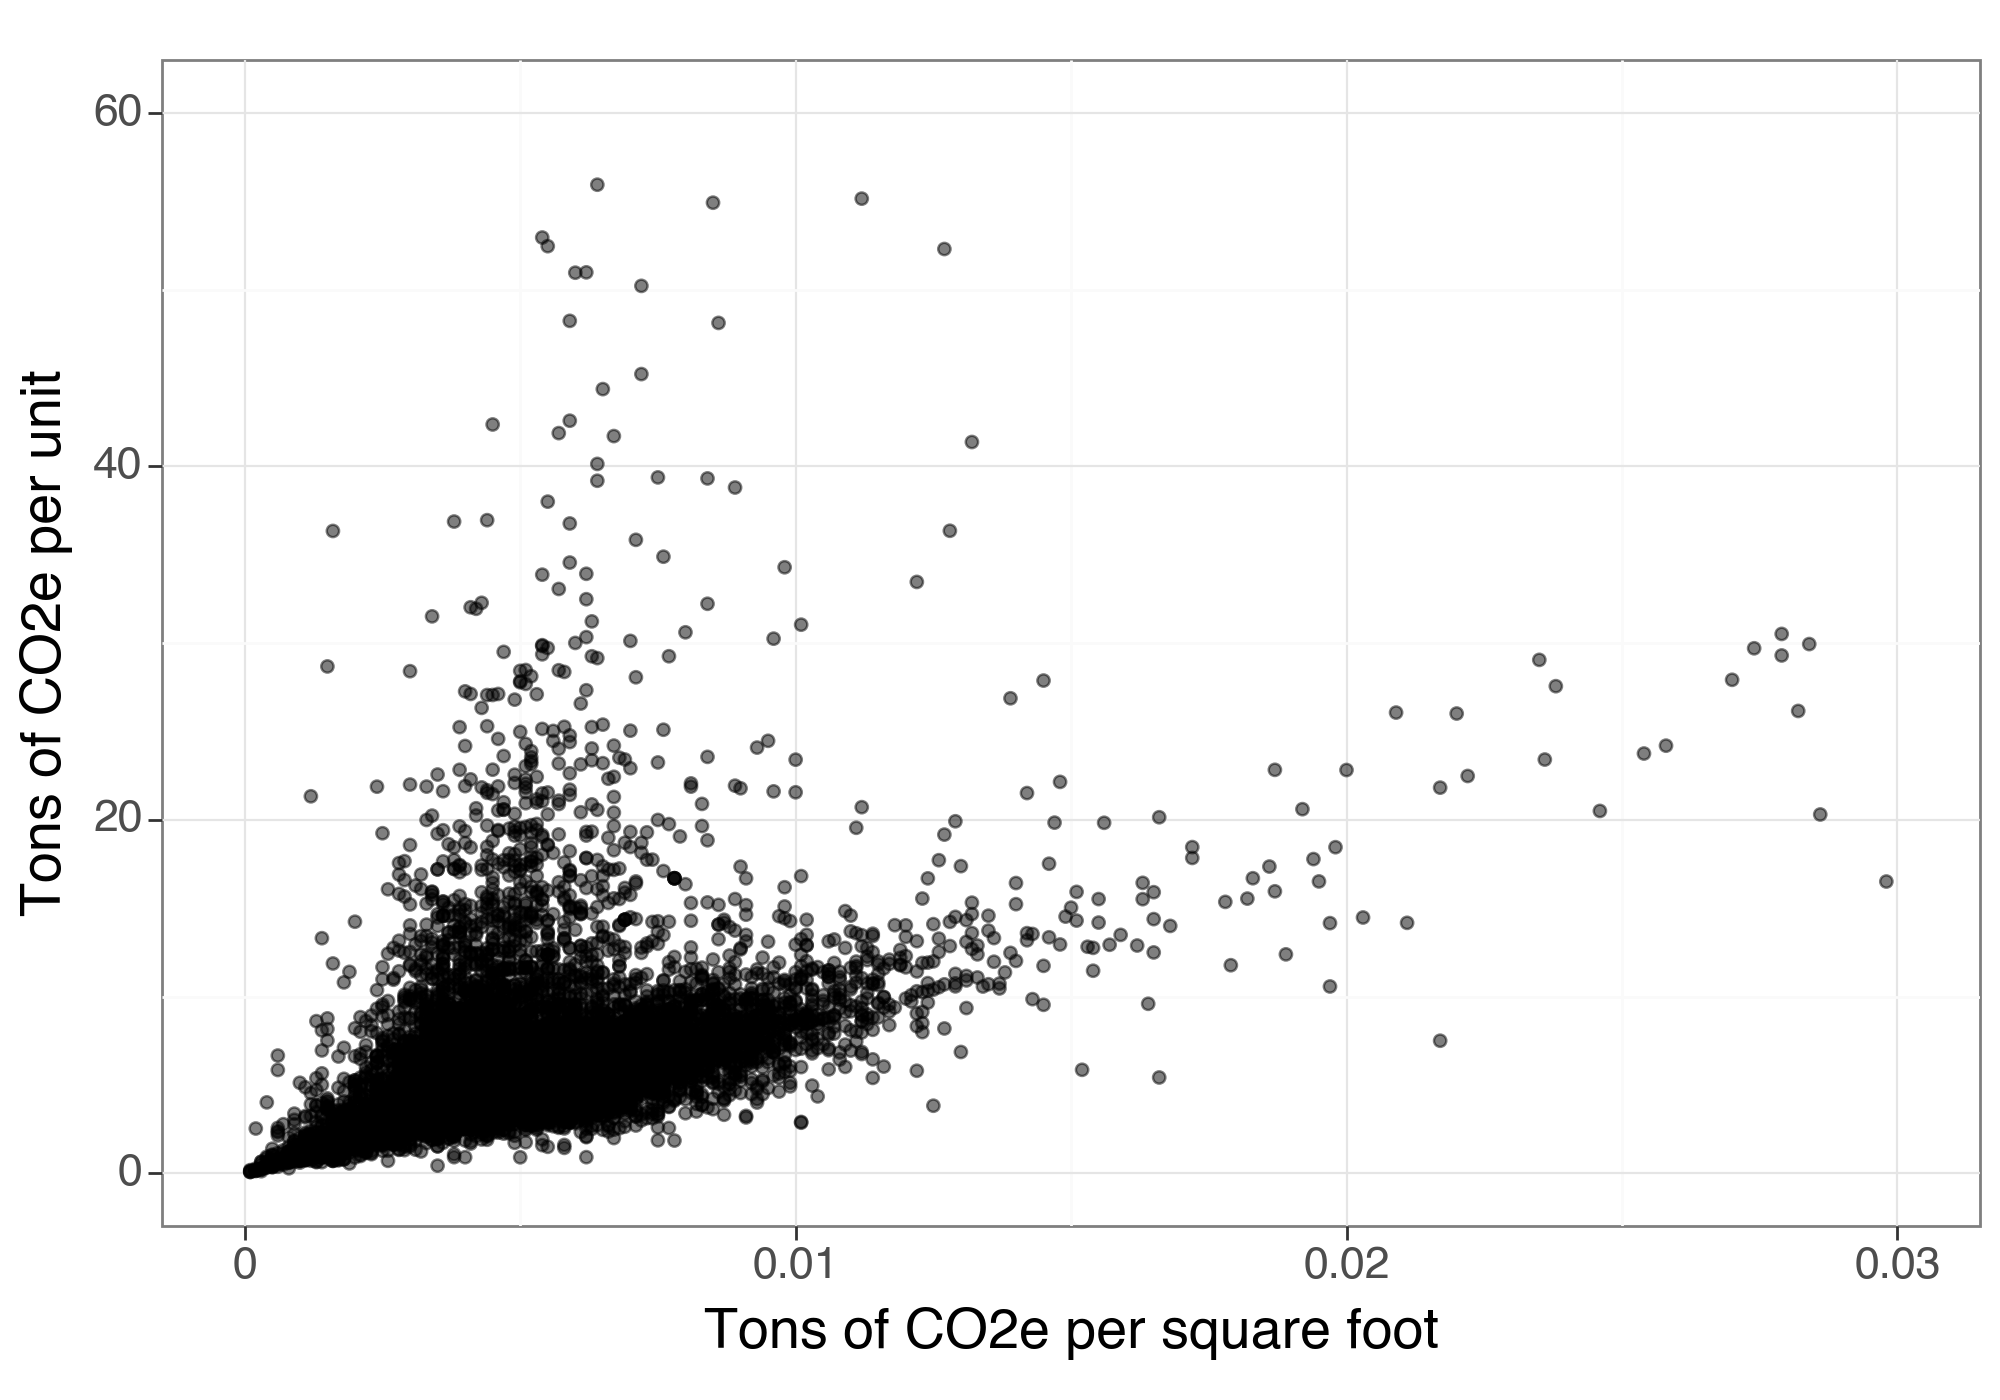

<Figure Size: (1000 x 700)>

In [16]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt")) + 
 geom_point(alpha = .5, size = 2) +
 #geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.03) +
 ylim(0, 60) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit")
)

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 22 rows containing missing values.


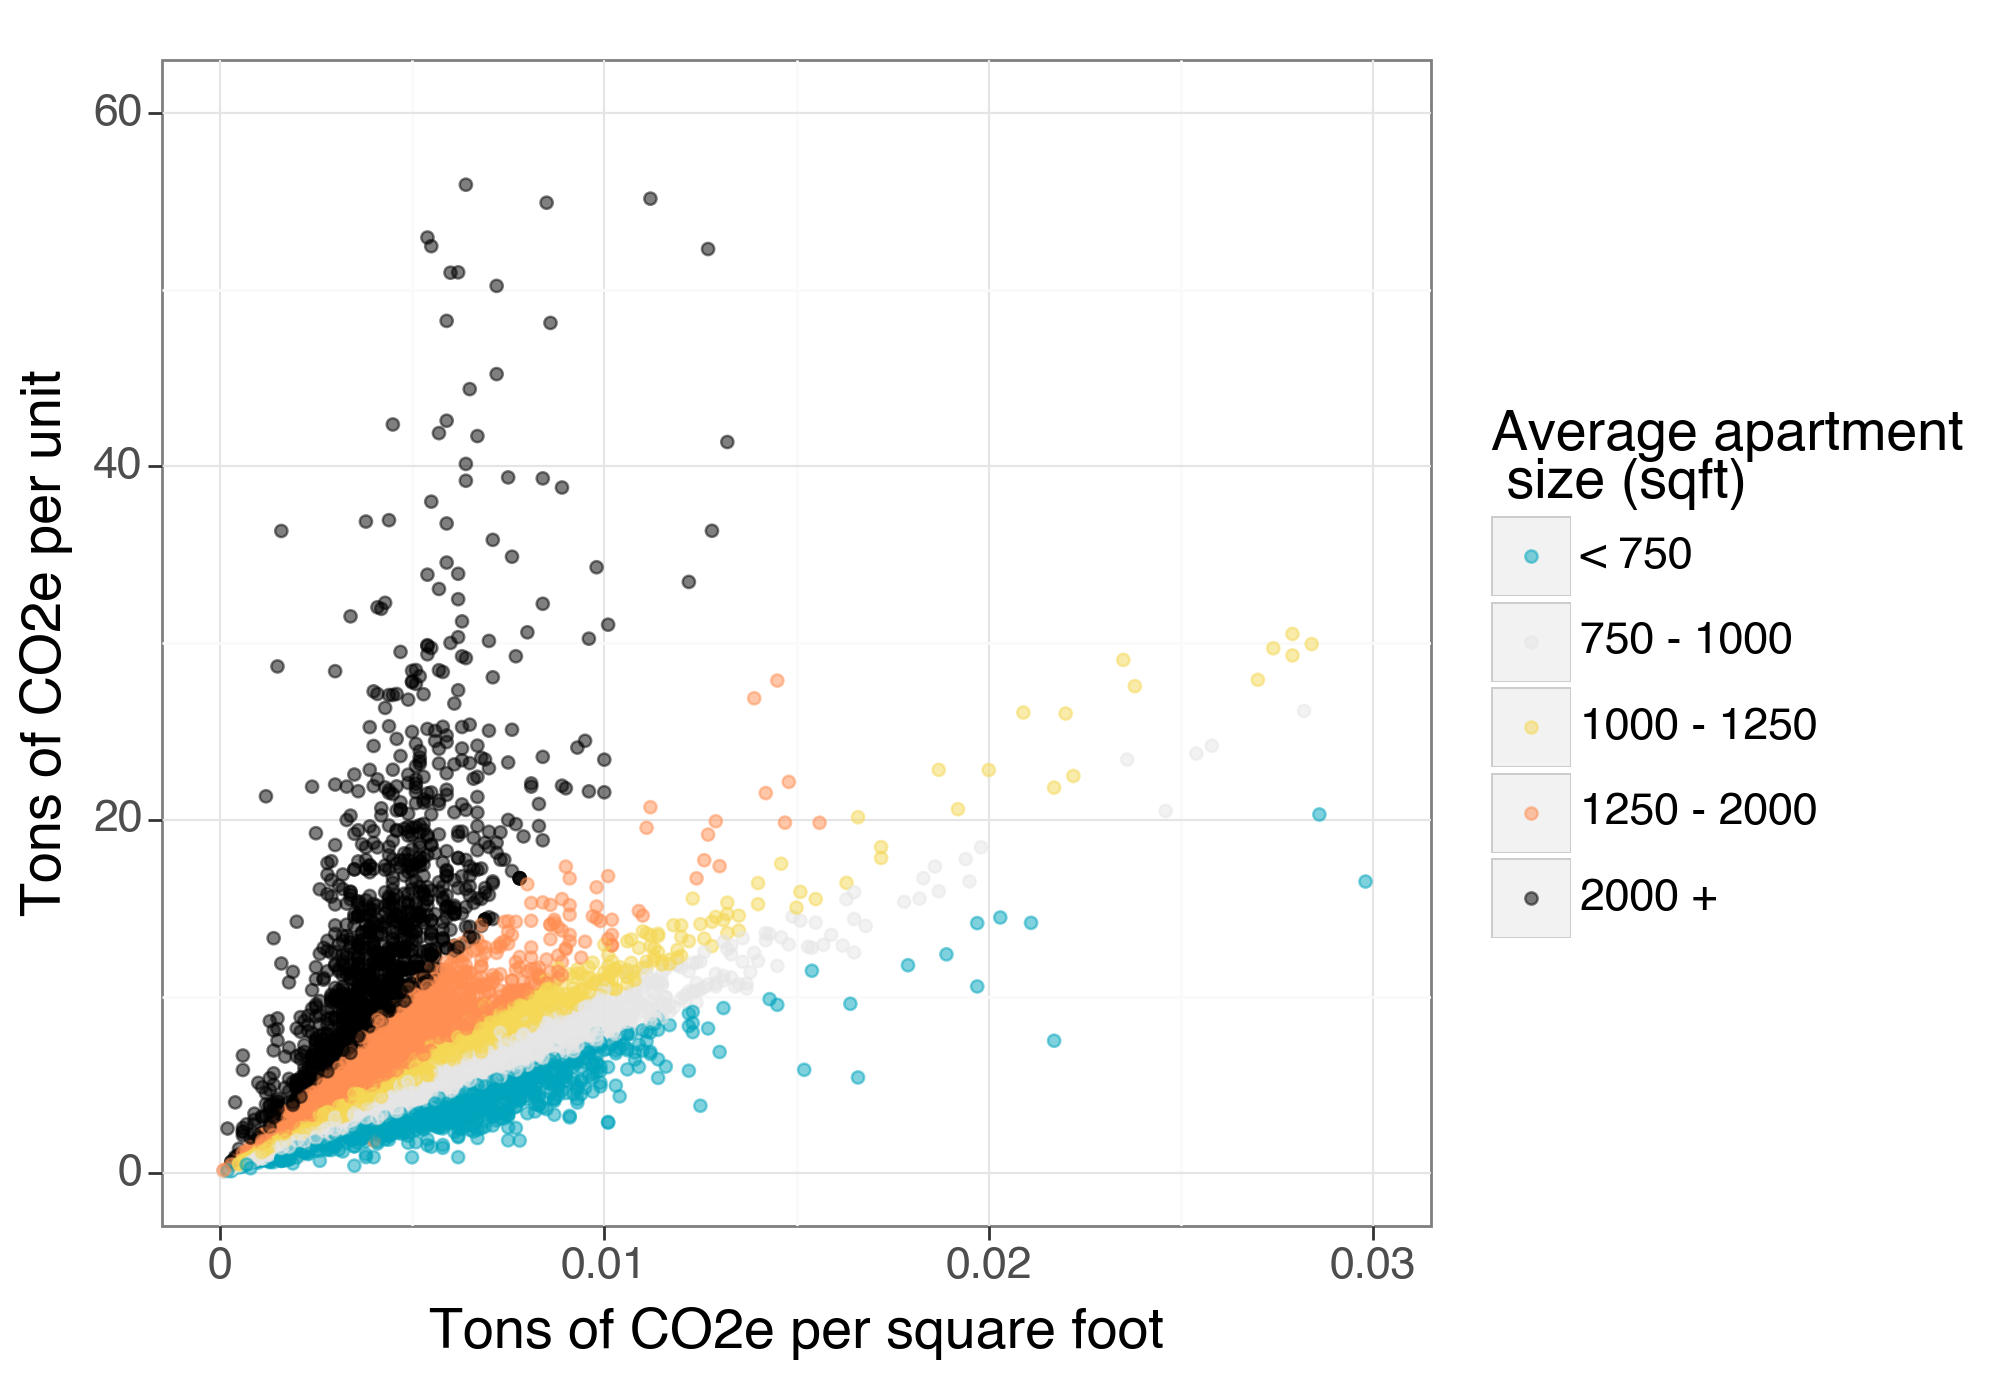

<Figure Size: (1000 x 700)>

In [17]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt", color = "apt_size_cat")) + 
 geom_point(alpha = .5, size = 2) +
 #geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 scale_color_manual(name = "Average apartment \n size (sqft) \n", values = colors) + 
 theme_bw(base_size=20) +
 theme(figure_size = (10,7)) + 
 xlim(0, 0.03) +
 ylim(0, 60) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit")
)

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16975/1364595843.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


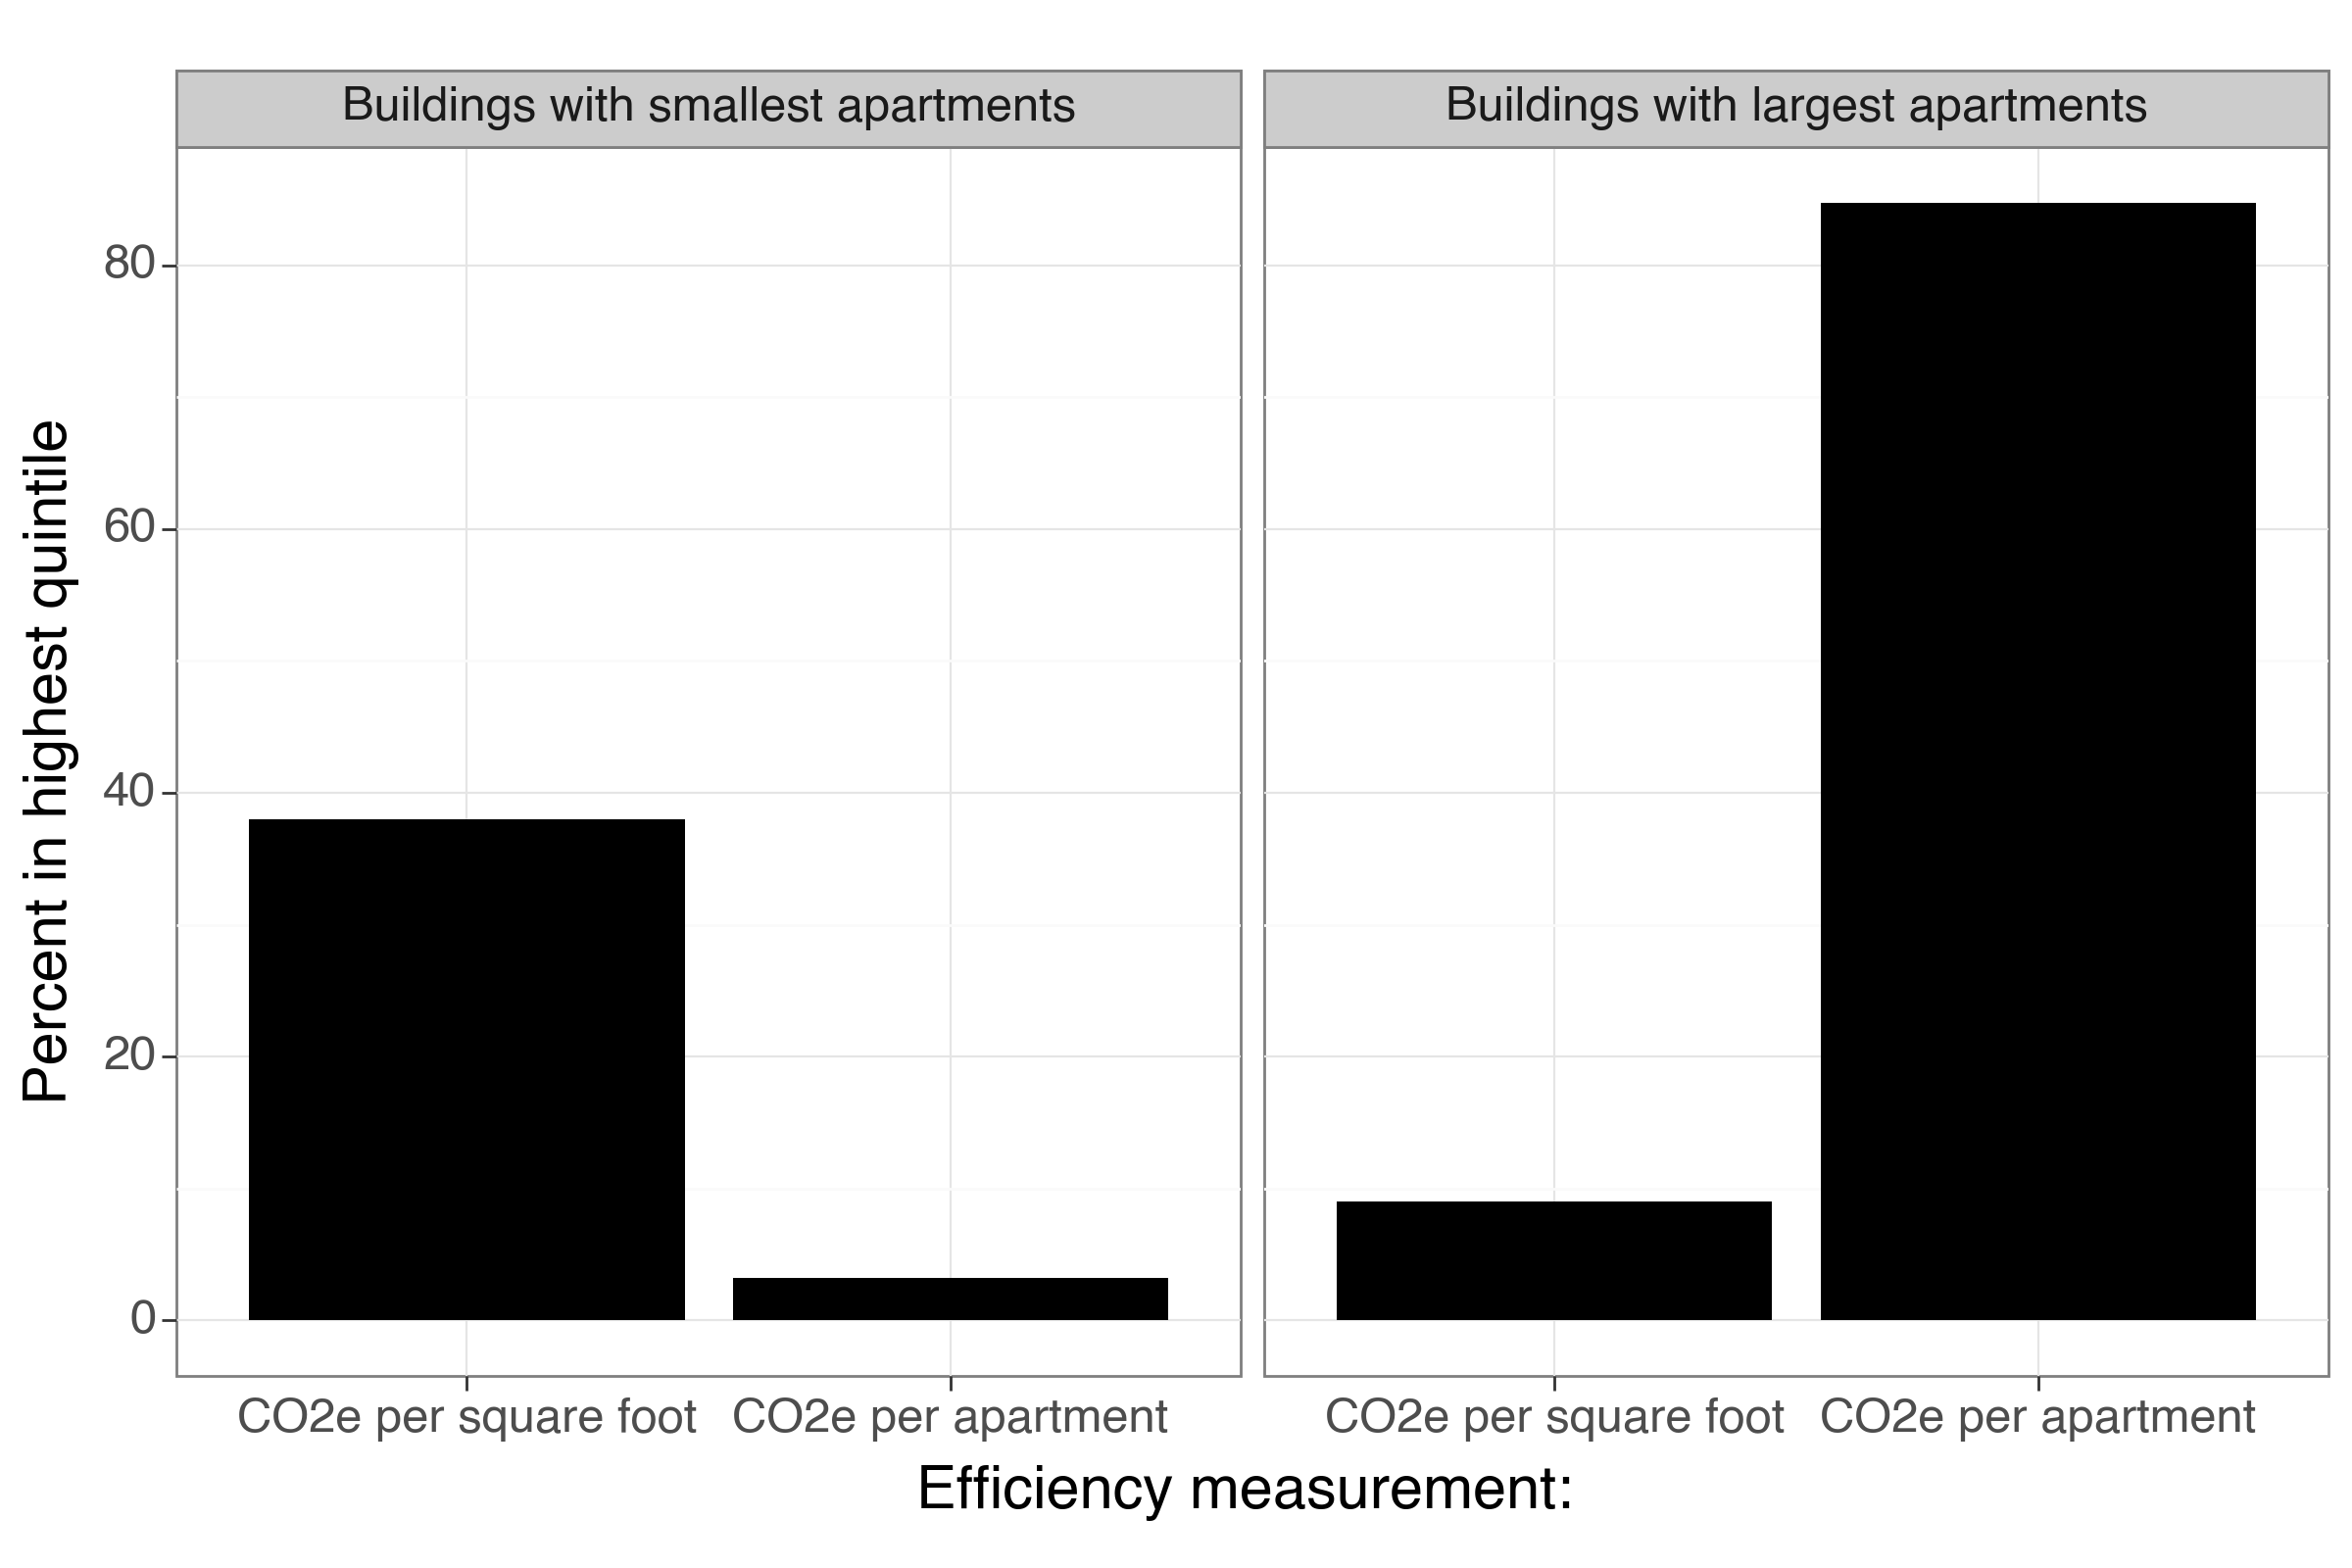

<Figure Size: (1200 x 800)>

In [69]:
plot_dat = ghg.groupby("apt_size_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "apt_size_cat")
plot_dat = plot_dat.query("apt_size_cat.isin(['< 750', '2000 +'])").replace({"< 750" : "Buildings with smallest apartments", "2000 +" : "Buildings with largest apartments"})
plot_dat["value"] = plot_dat["value"] * 100

(ggplot(plot_dat, aes(x = "variable", y = "value")) +
 geom_bar(position = "dodge", stat = "identity", fill = "black") +
 scale_x_discrete(labels = ["CO2e per square foot", "CO2e per apartment"]) +
 facet_wrap("~apt_size_cat") +
 labs(y = "Percent in highest quintile", x = "Efficiency measurement: ") +
 theme_bw(base_size= 22) +
 theme(figure_size=(12,8)))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16975/2588901386.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


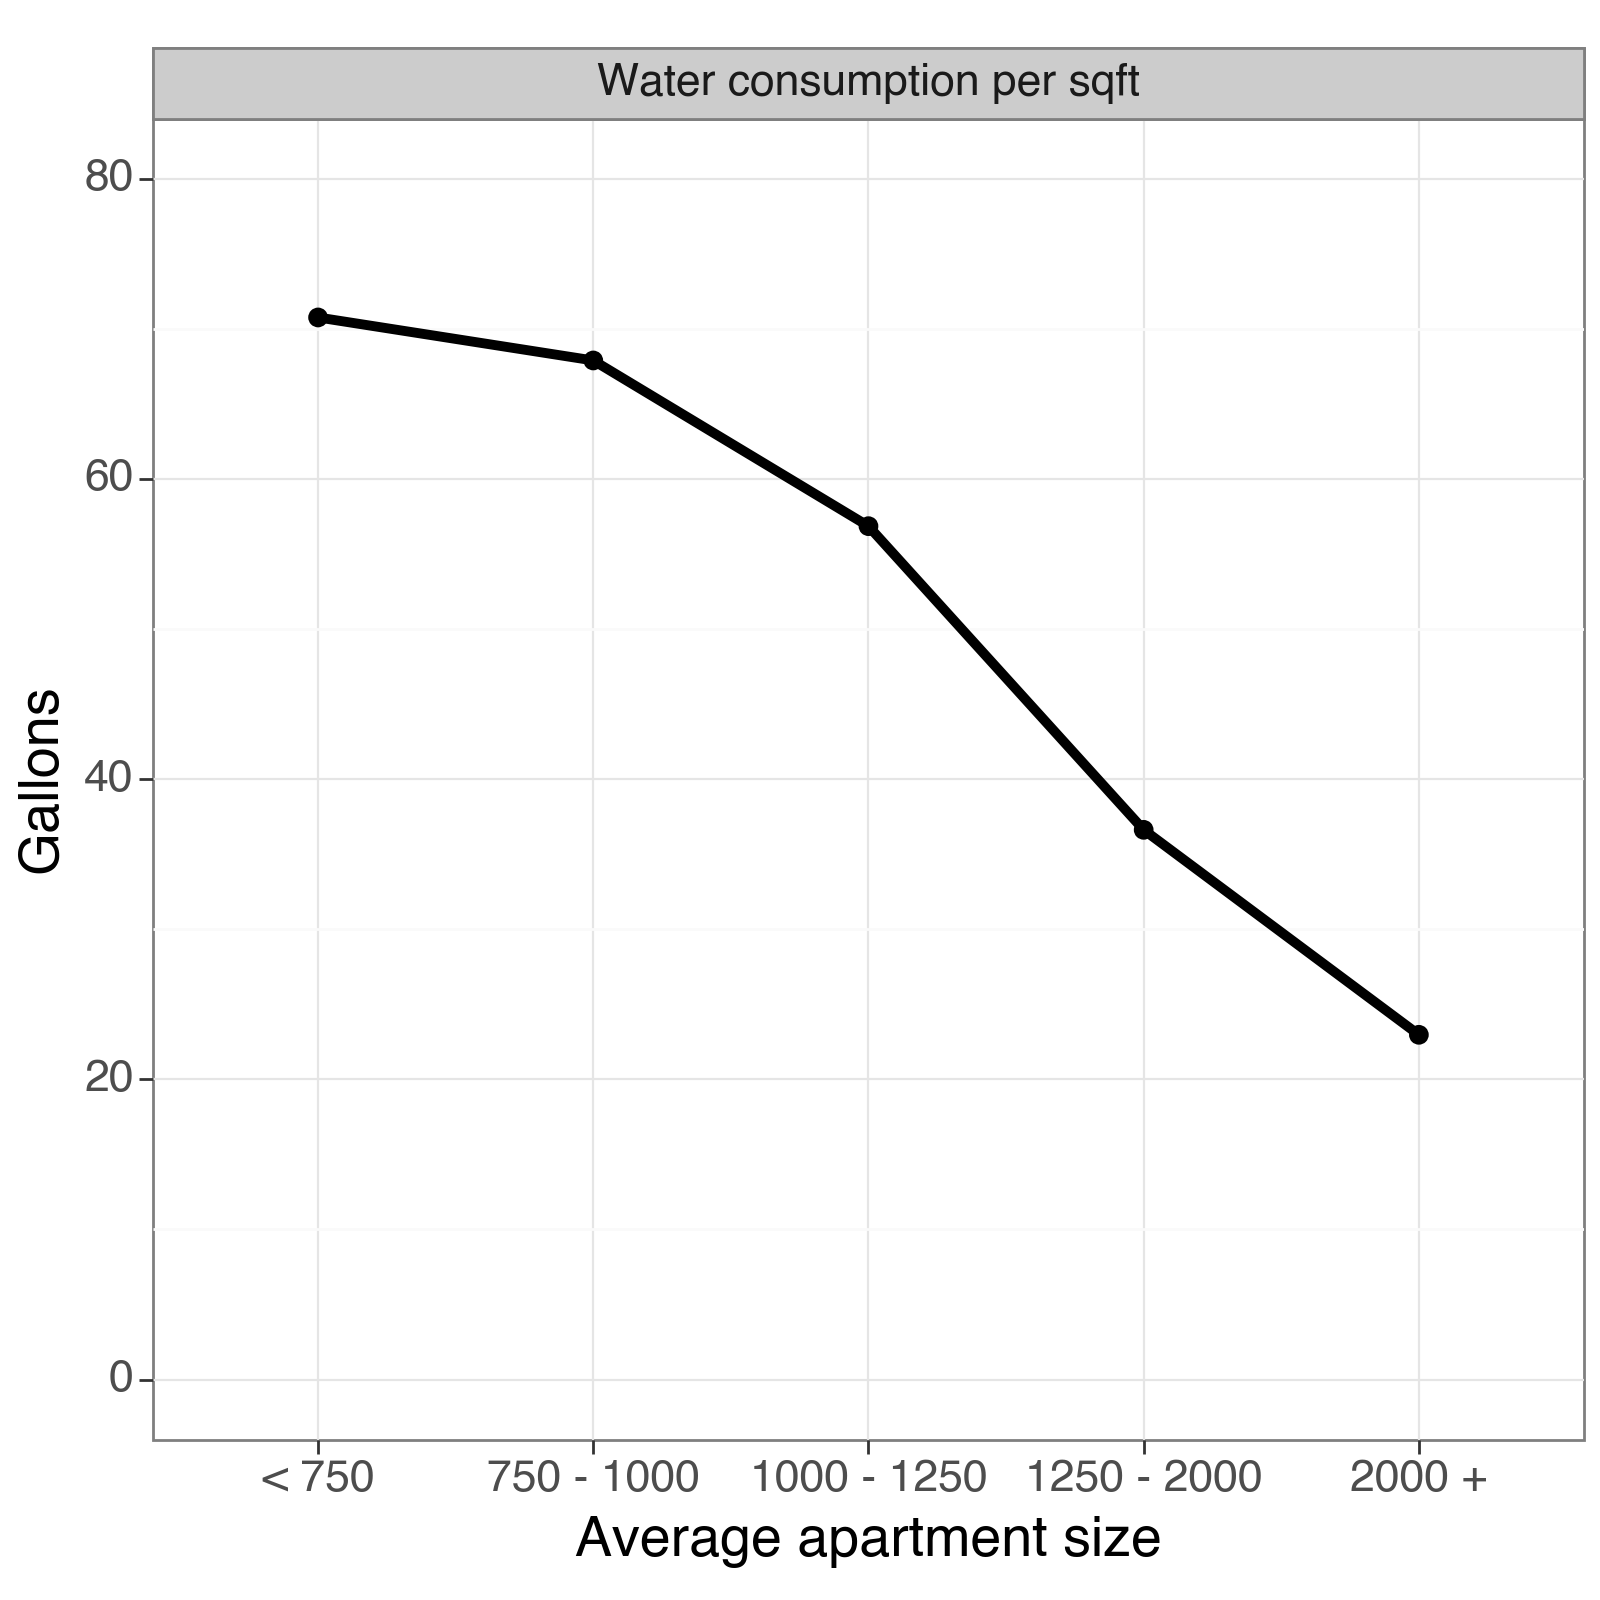

<Figure Size: (800 x 800)>

In [158]:
plot_dat = ghg.groupby("apt_size_cat_rev")[["water_per_sqft", "water_per_apt"]].median().reset_index().rename({"water_per_sqft" : "Water consumption per sqft", "water_per_apt" : "Water consumption per apartment"}, axis =1).melt("apt_size_cat_rev")
(ggplot(plot_dat.query("variable == 'Water consumption per sqft'"), aes(x = "apt_size_cat_rev", y = "value", group = "variable")) + 
 geom_point(size = 3) + 
 geom_line(size = 2) +
 facet_wrap("~variable") +
theme_bw(base_size= 20) + 
ylim(0, 80) +
labs(x = "Average apartment size", y = "Gallons") +
 theme(figure_size=(8,8), legend_position="top") )

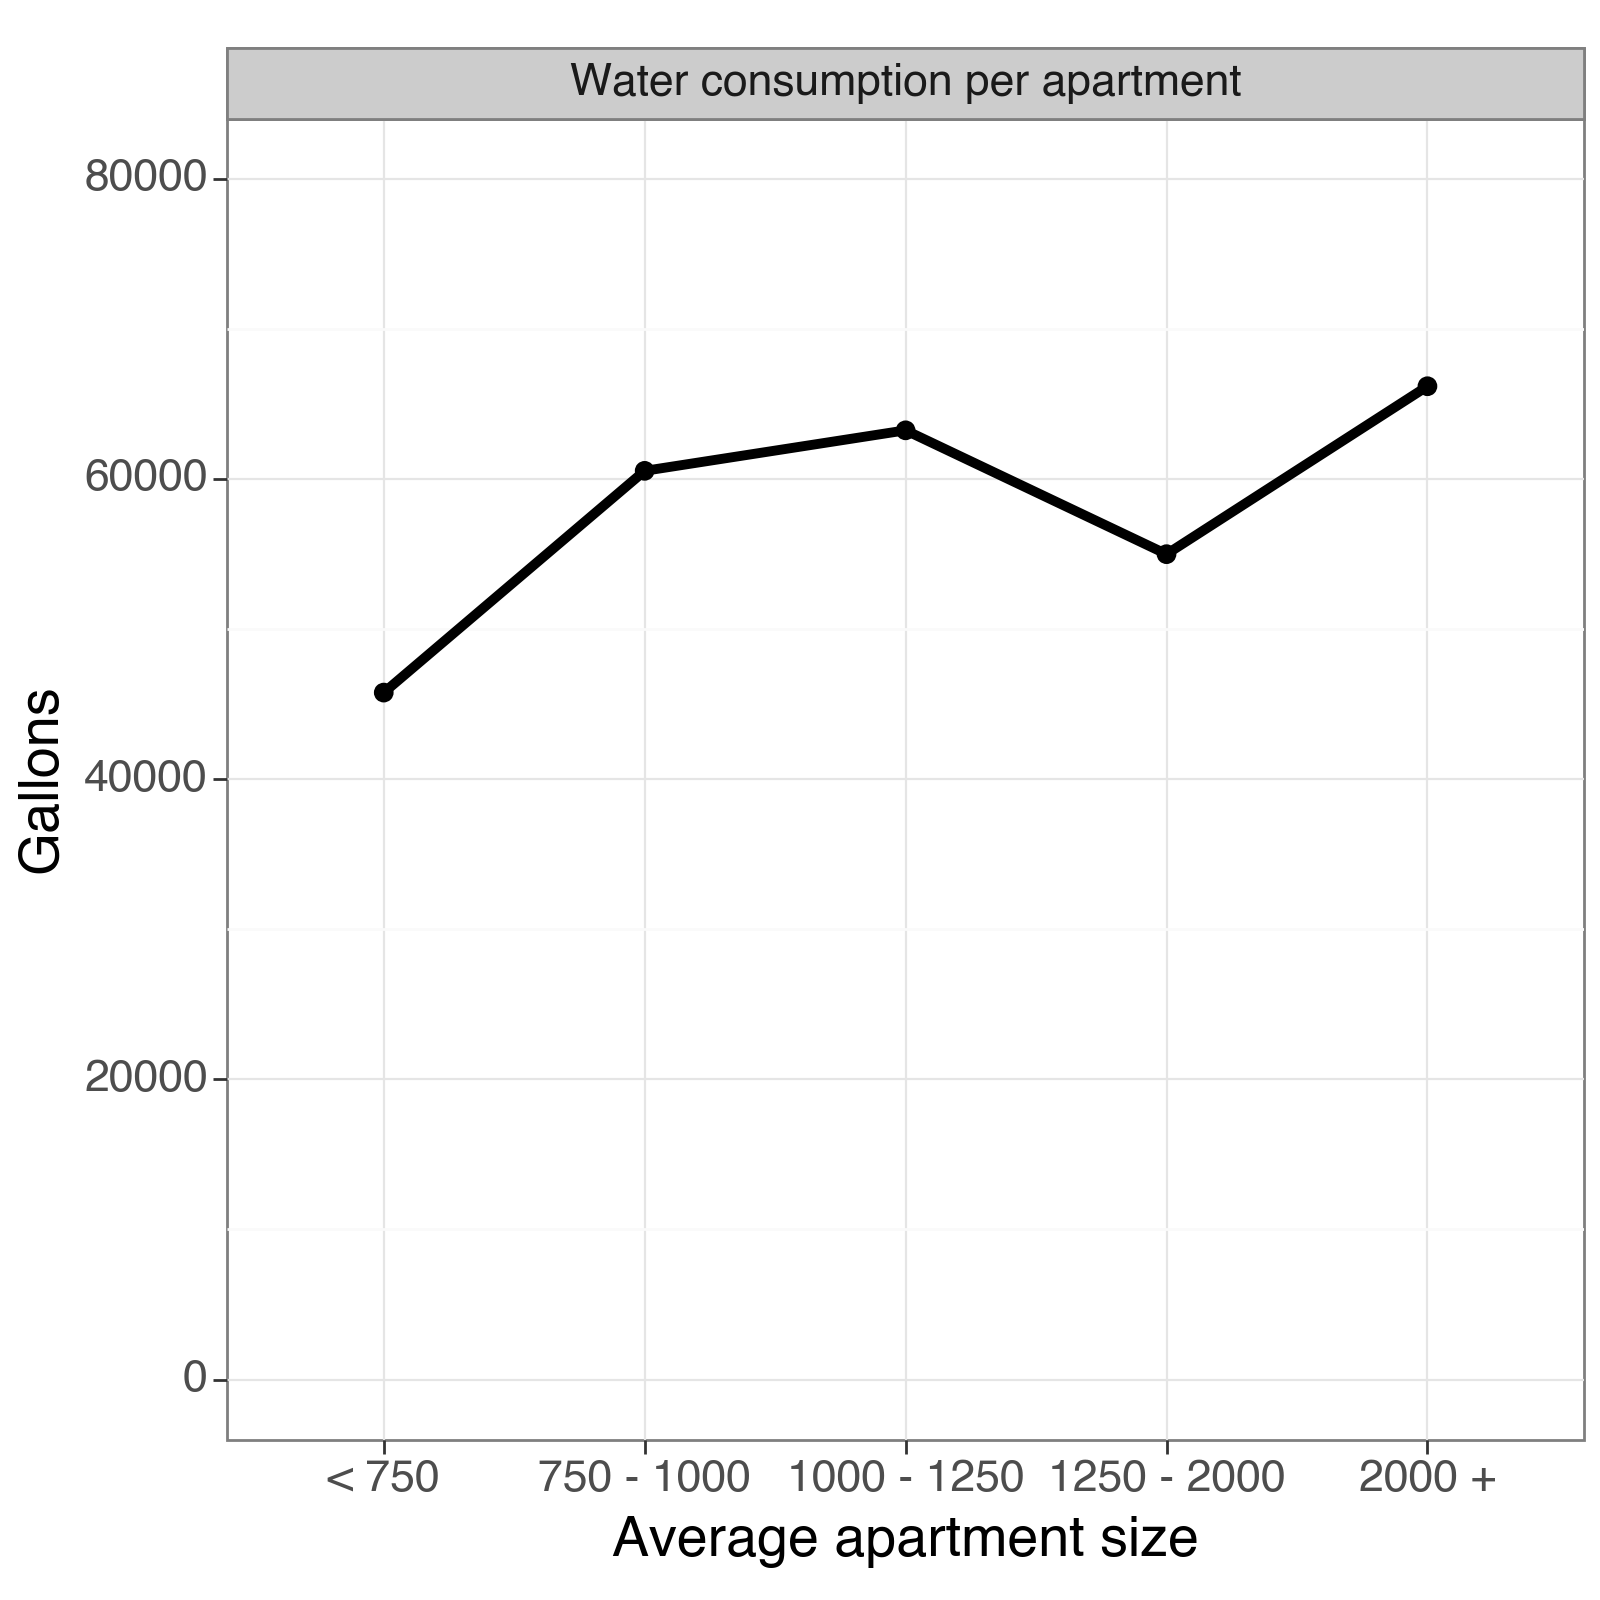

<Figure Size: (800 x 800)>

In [20]:
(ggplot(plot_dat.query("variable == 'Water consumption per apartment'"), aes(x = "apt_size_cat", y = "value", group = "variable")) + 
 geom_point(size = 3) + 
 geom_line(size = 2) +
 facet_wrap("~variable") +
theme_bw(base_size= 20) + 
ylim(0, 80000) +
labs(x = "Average apartment size", y = "Gallons") +
 theme(figure_size=(8,8), legend_position="top"))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5042 rows containing missing values.


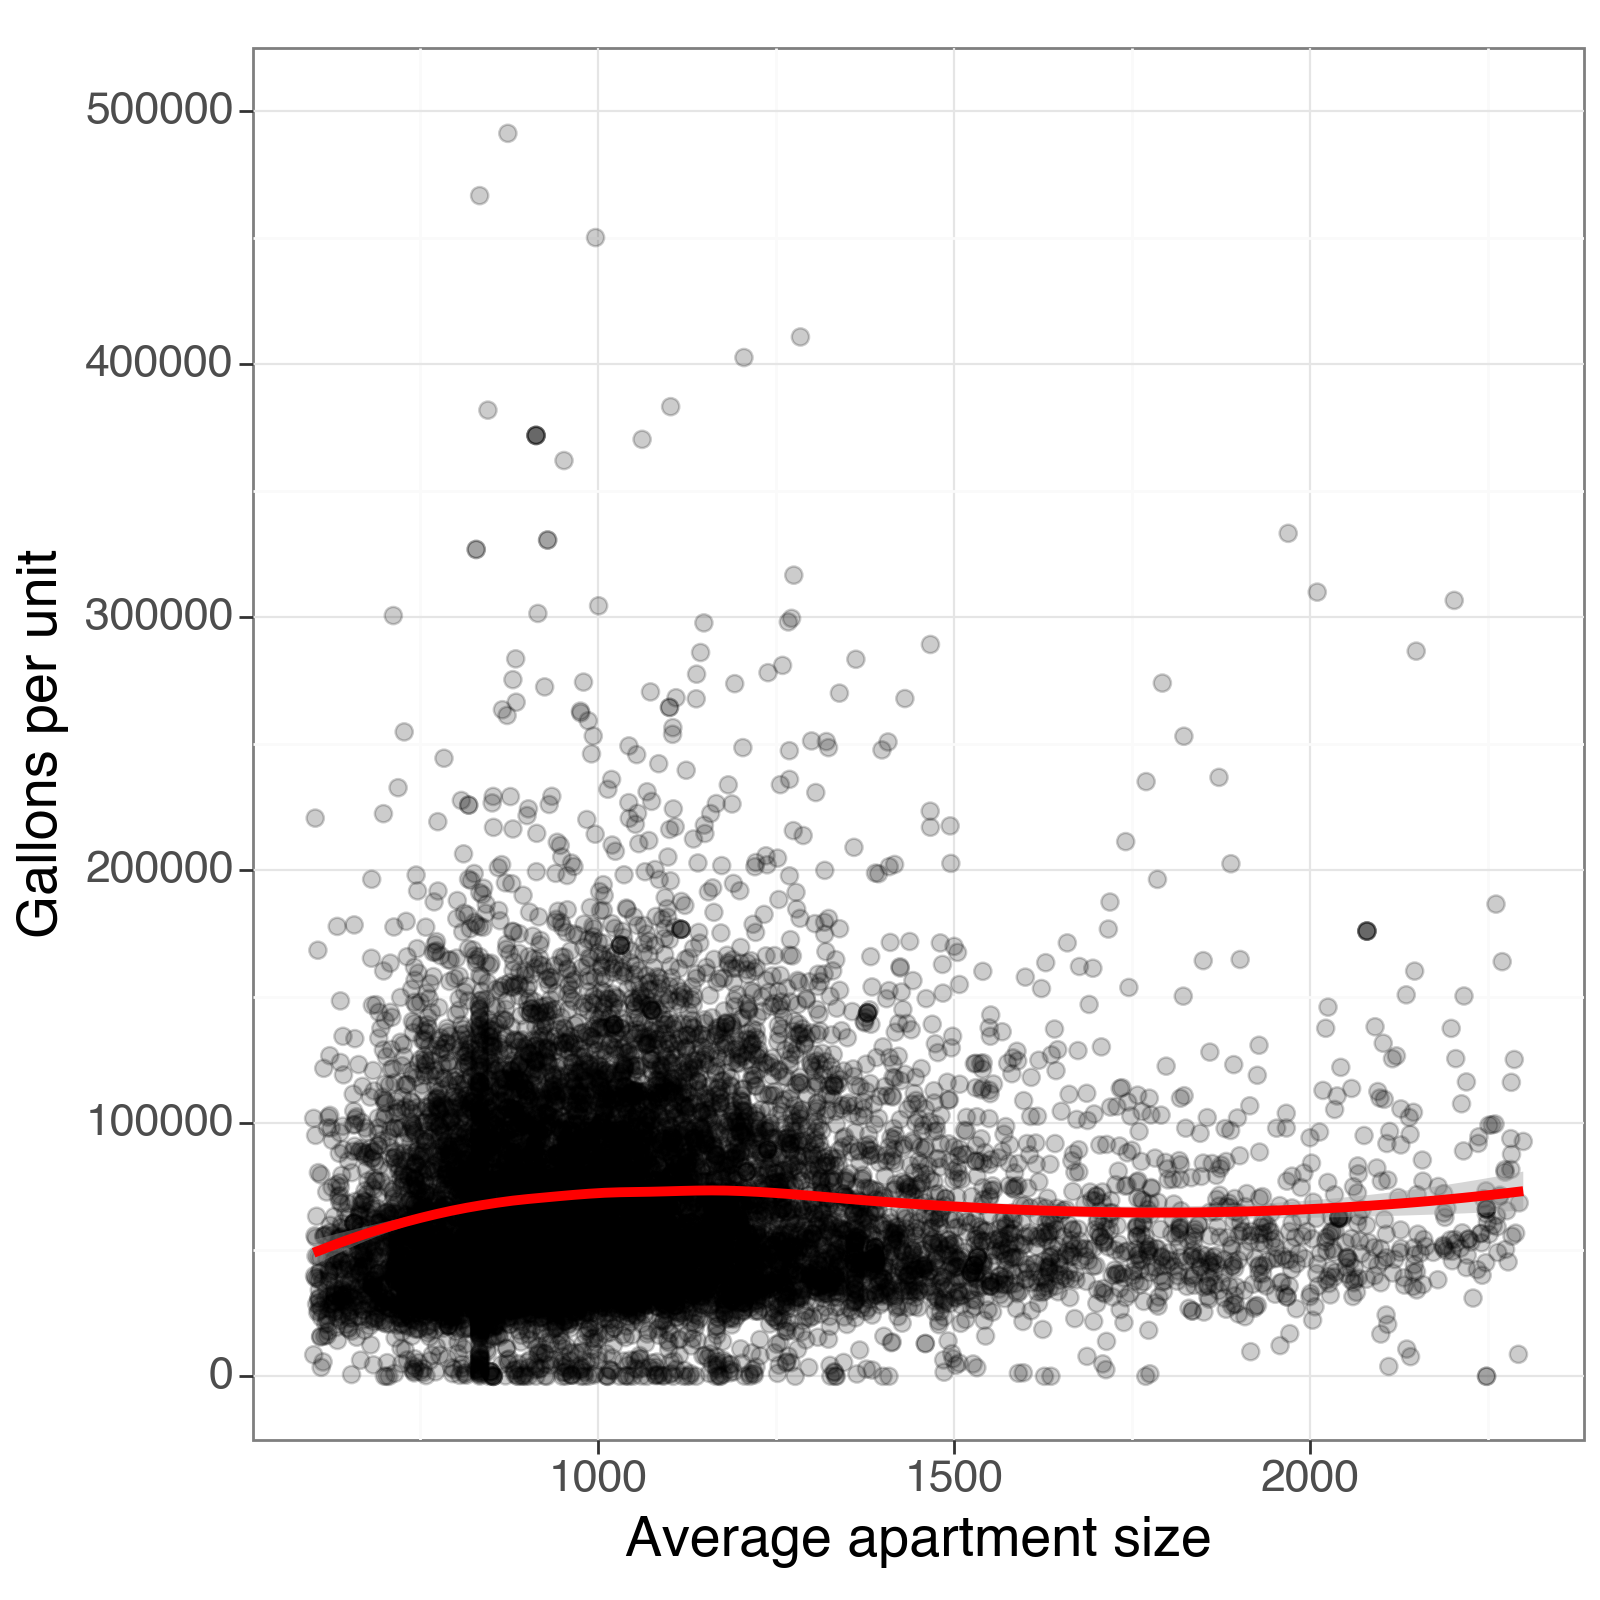

<Figure Size: (800 x 800)>

In [21]:
(ggplot(ghg, aes(x = "avg_apt_size", y = "water_per_apt")) + 
 geom_point(size = 3, alpha = .2) + 
 geom_smooth(size = 2, color = "red", method = "loess") +
 theme_bw(base_size= 20) + 
 labs(x = "Average apartment size", y = "Gallons per unit") +
 theme(figure_size=(8,8), legend_position="top") +
 xlim(600, 2300) +
 ylim(0, 500000)
)

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5094 rows containing missing values.


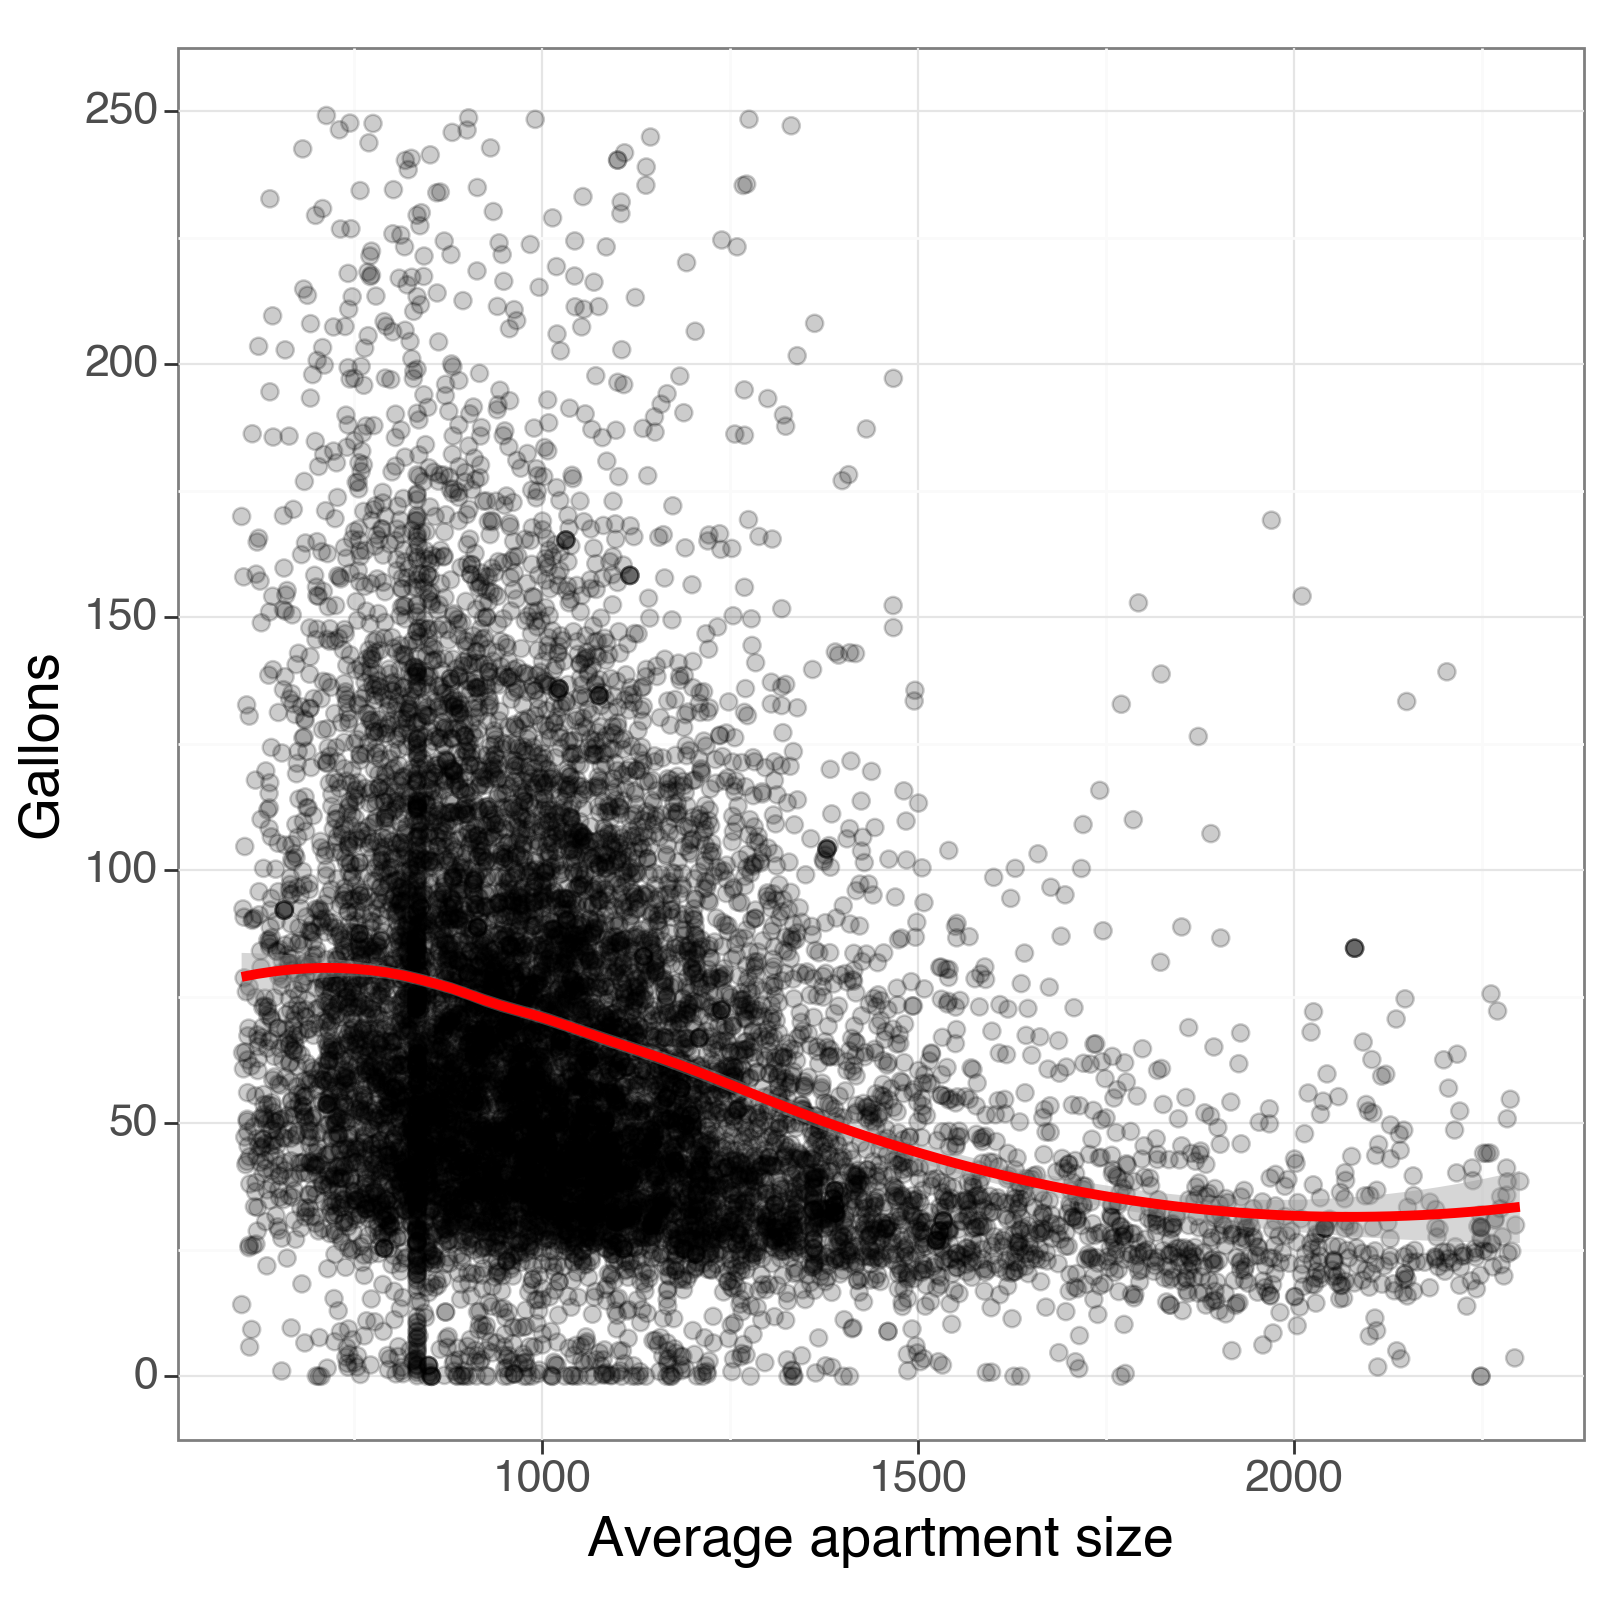

<Figure Size: (800 x 800)>

In [22]:
(ggplot(ghg, aes(x = "avg_apt_size", y = "water_per_sqft")) + 
 geom_point(size = 3, alpha = .2) + 
 geom_smooth(size = 2, color = "red", method = "loess") +
theme_bw(base_size= 20) + 
labs(x = "Average apartment size", y = "Gallons") +
 theme(figure_size=(8,8), legend_position="top") +
 xlim(600, 2300) +
 ylim(0, 250)
)

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16975/746961129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


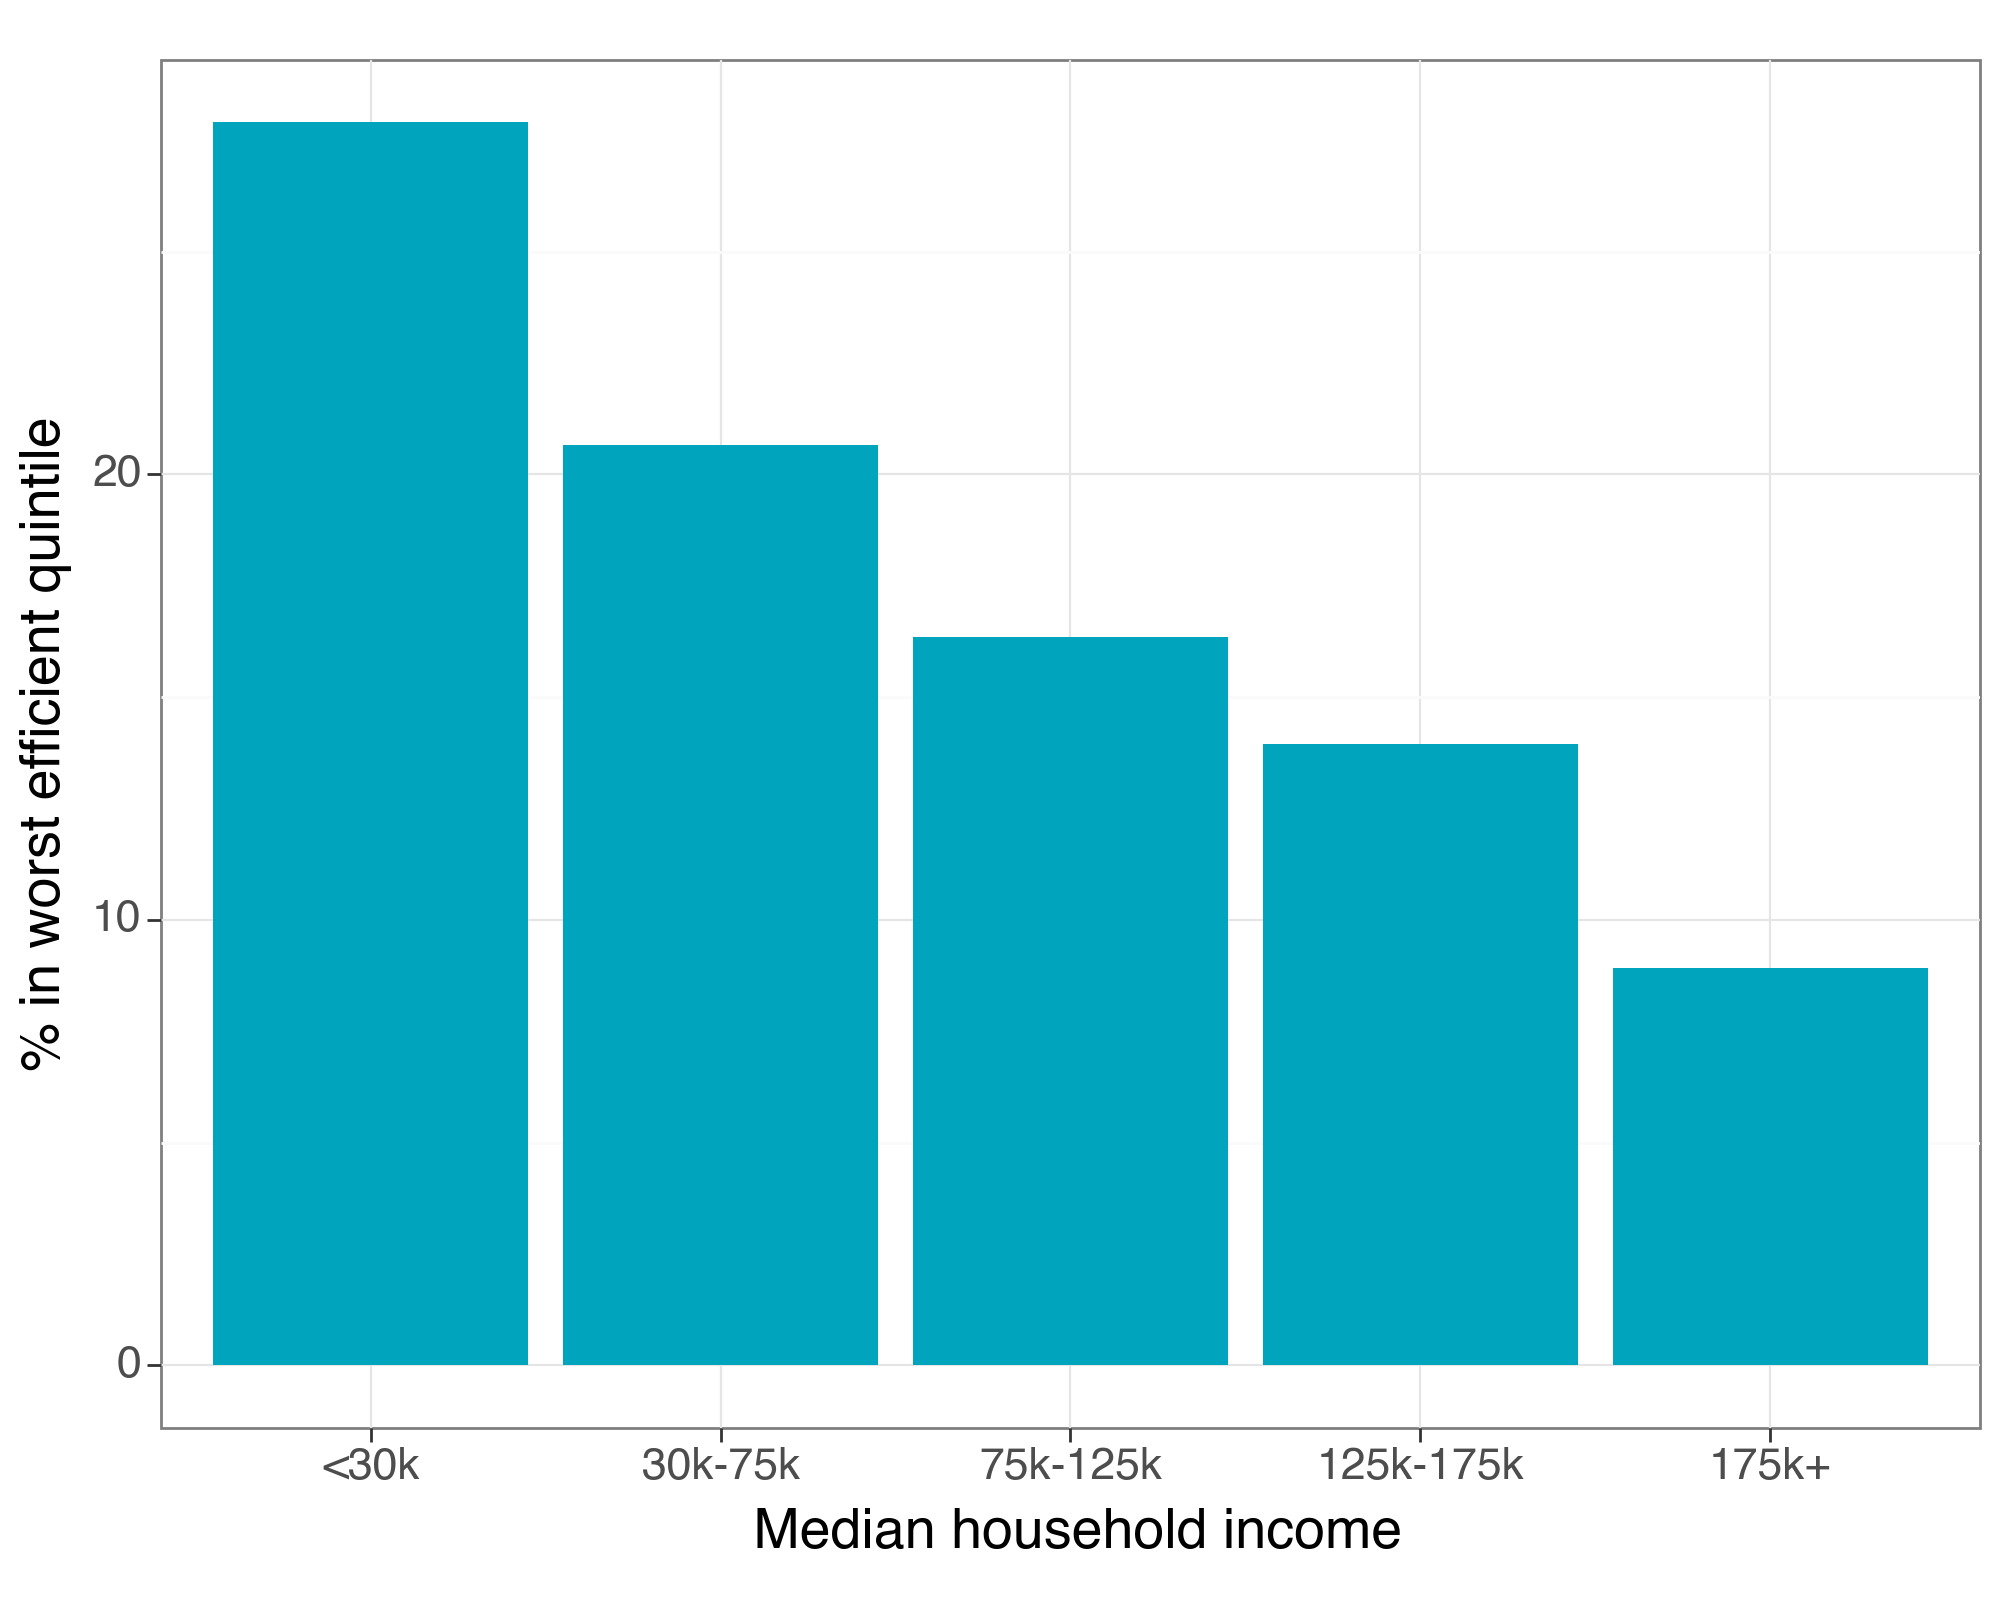

<Figure Size: (1000 x 800)>

In [153]:
(ggplot(ghg.groupby("income_bin")["bottom_quint"].mean().reset_index(), aes(x = "income_bin", y = "bottom_quint")) + geom_bar(fill = colors[0],stat = "identity") + 
 labs(y = "% in worst efficient quintile", x = " Median household income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top") + 
  scale_y_continuous(labels=lambda l: ["{:.0f}".format(v * 100) for v in l]))  # Scale y-axis by 100 without adding percent sign

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16975/3234330573.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


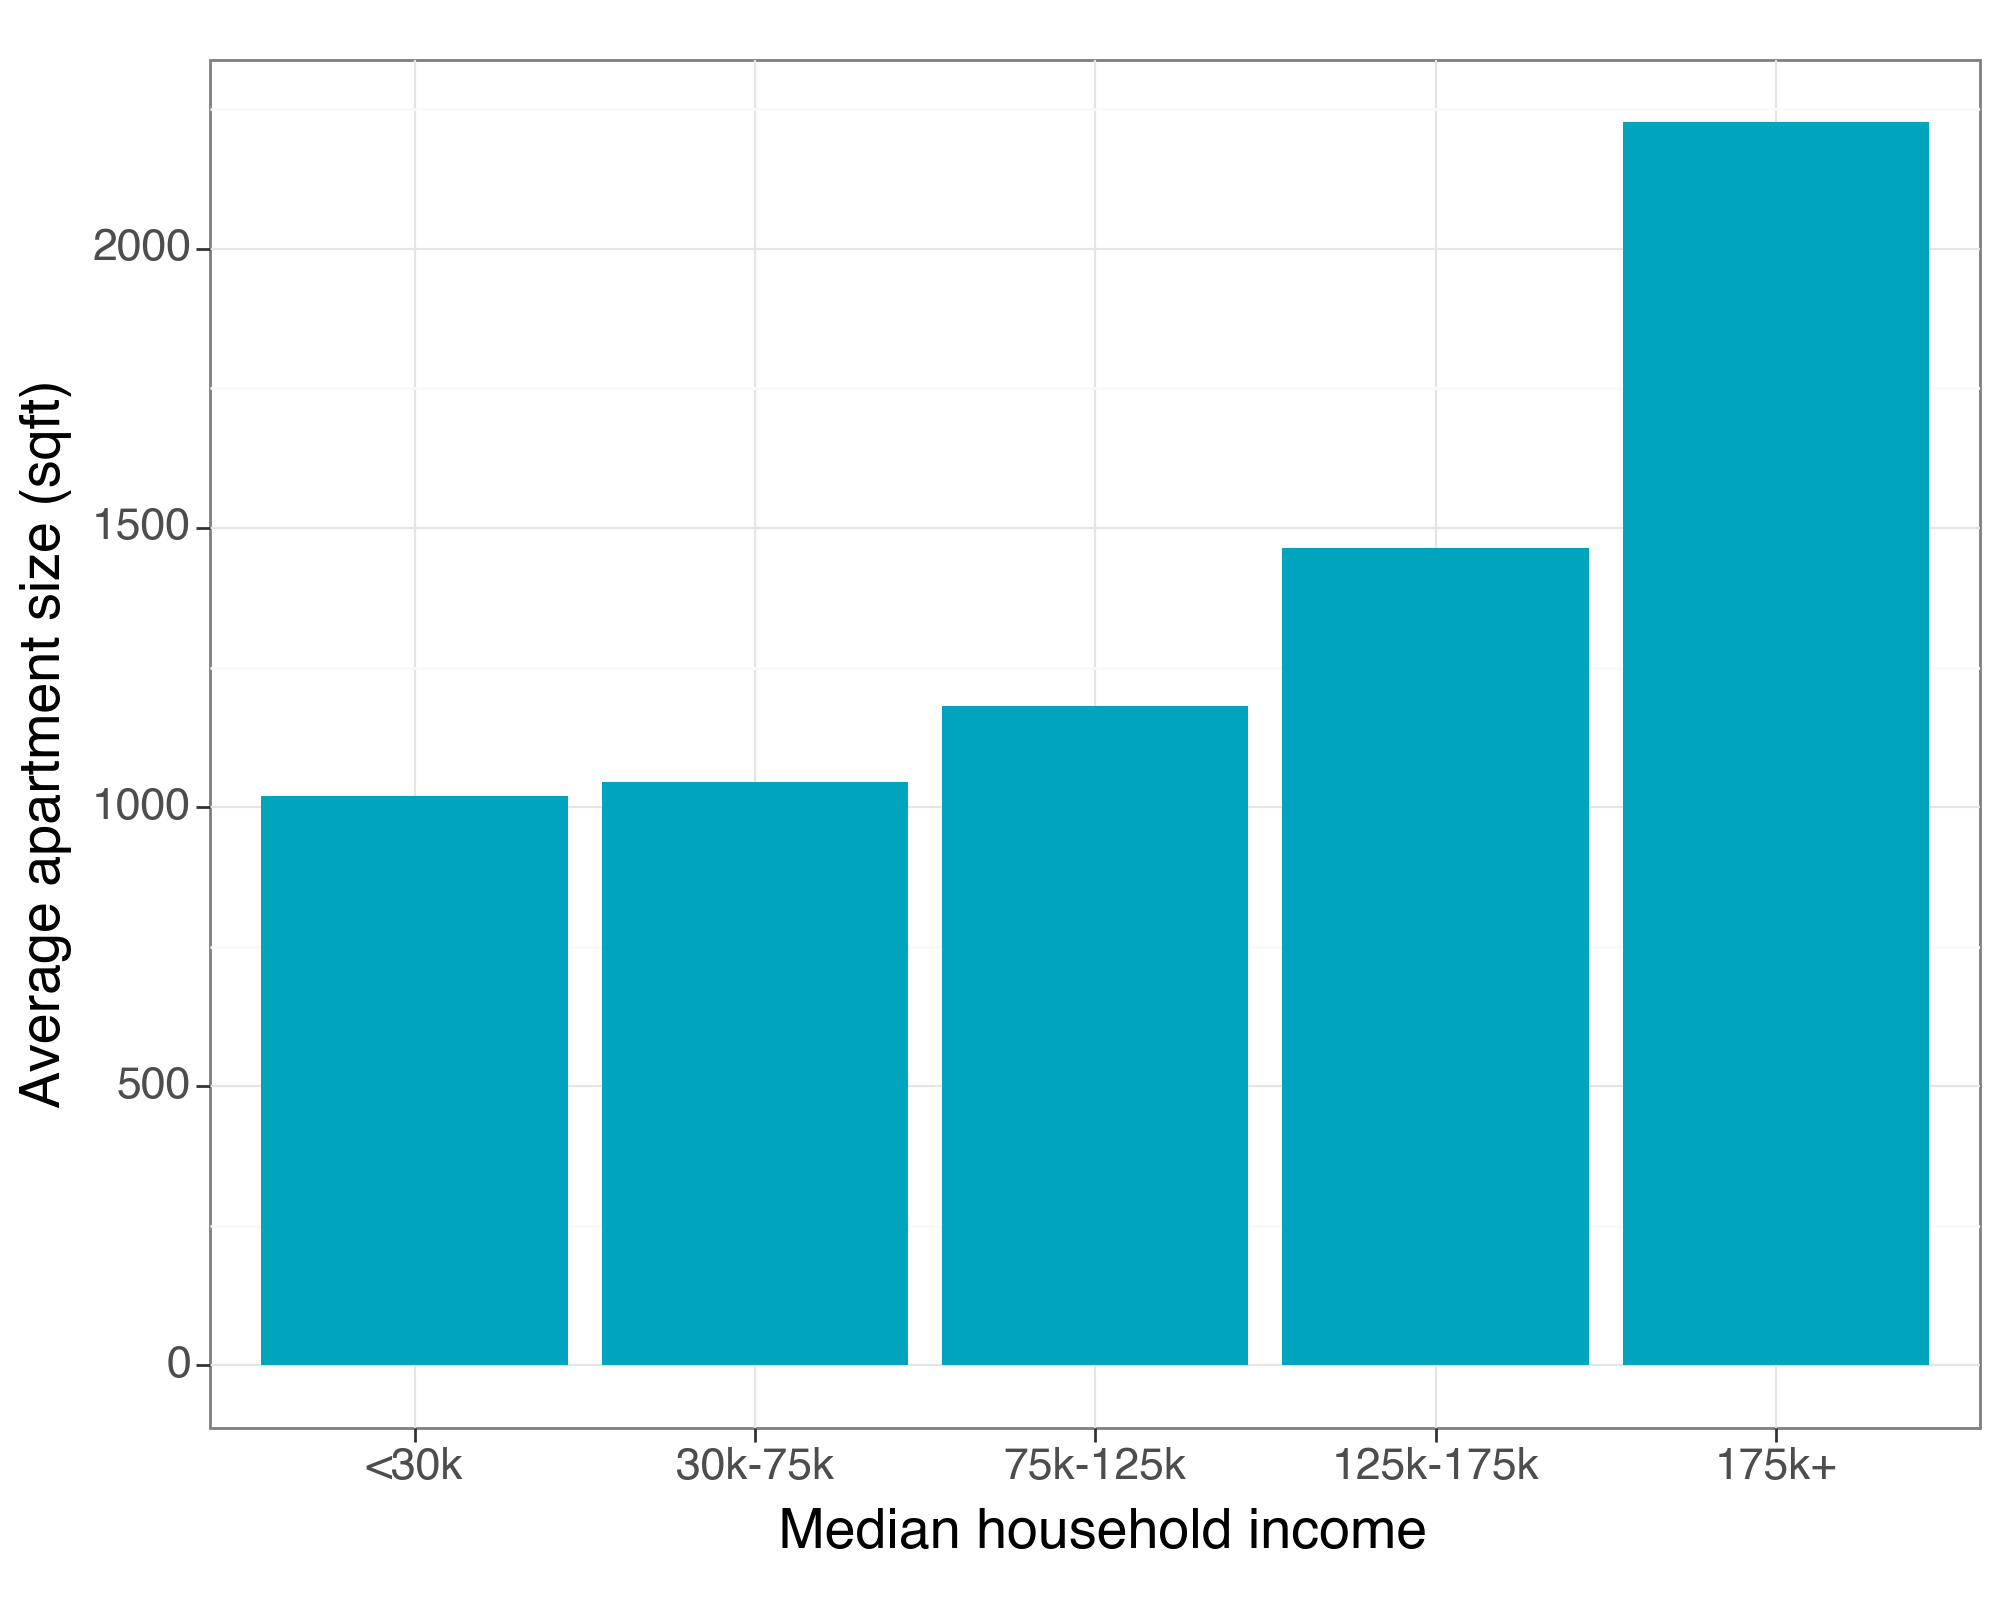

<Figure Size: (1000 x 800)>

In [154]:
(ggplot(ghg.groupby("income_bin")["avg_apt_size"].mean().reset_index(), aes(x = "income_bin", y = "avg_apt_size")) + geom_bar(stat = "identity", fill = colors[0]) + 
 labs(y = "Average apartment size (sqft)", x = " Median household income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [95]:
ghg.groupby("apt_size_cat")["kwh_per_sqft"].mean().reset_index()

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16975/2684469462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


apt_size_cat  kwh_per_sqft
0        < 750      6.222515
1   750 - 1000      5.148201
2  1000 - 1250      4.809639
3  1250 - 2000      5.232241
4       2000 +      6.764950

In [90]:
ghg["direct_emissions_sqft"] = ghg

0         77.2
1        177.1
2        185.1
4        250.3
5        162.4
         ...  
17153    529.4
17154    220.6
17155    340.5
17156    243.5
17157    162.9
Name: direct_emissions, Length: 16540, dtype: float64

In [70]:
ghg["borough"] = ghg["bbl"].str.slice(0,1)

In [160]:
import folium

cds = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=GeoJSON")
ghg_cds = ghg.overlay(cds)
ghg_cds.query("boro_cd == '305'")["co2_intensity"].describe()
cd_plot_dat = ghg_cds.groupby("boro_cd").agg({"co2_intensity" : "median", "co2_per_apt" : "median", "bbl" : "nunique", "bottom_quint" : "mean"}).reset_index().merge(cds).query("bbl > 50")
cd_plot_dat = gpd.GeoDataFrame(cd_plot_dat)

base_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

folium.Choropleth(
    geo_data=cd_plot_dat,
    data=cd_plot_dat,
    columns=["boro_cd", "co2_per_apt"],
    key_on="feature.properties.boro_cd",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="co2_per_apt",
    reset=True,
).add_to(base_map)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 100px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;">

&nbsp; Legend <br>
&nbsp; Item 1: Value 1 <br>
&nbsp; Item 2: Value 2 <br>
</div>
'''

base_map.get_root().html.add_child(folium.Element(legend_html))





folium.LayerControl().add_to(base_map)
base_map

In [25]:
mod_ghg = ghg.copy()
#mod_ghg["apt_size_cat"] = mod_ghg["apt_size_cat"].astype(str)


In [46]:
unadjusted = smf.logit("bottom_quint ~ apt_size_cat", data = mod_ghg).fit()
unadjusted.summary()

Optimization terminated successfully.
         Current function value: 0.458952
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           bottom_quint   No. Observations:                16540
Model:                          Logit   Df Residuals:                    16535
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                 0.05221
Time:                        19:10:34   Log-Likelihood:                -7591.1
converged:                       True   LL-Null:                       -8009.3
Covariance Type:            nonrobust   LLR p-value:                1.006e-179
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4912      0.052     -9.532      0.000      -0.592      -0.390
apt_size_cat[T.750 - 1000]     -0.6577      0.059    -11.082      0.000      -0.774      -0.541
apt_size_cat[T.1000 - 1250]    -1.3192      0.066    -19.928      0.000      -1.449      -1.189
apt_size_cat[T.1250 - 2000]    -1.9485      0.088    -22.051      0.000      -2.122      -1.775
apt_size_cat[T.2000 +]         -1.8234      0.113    -16.098      0.000      -2.045      -1.601
===============================================================================================
"""

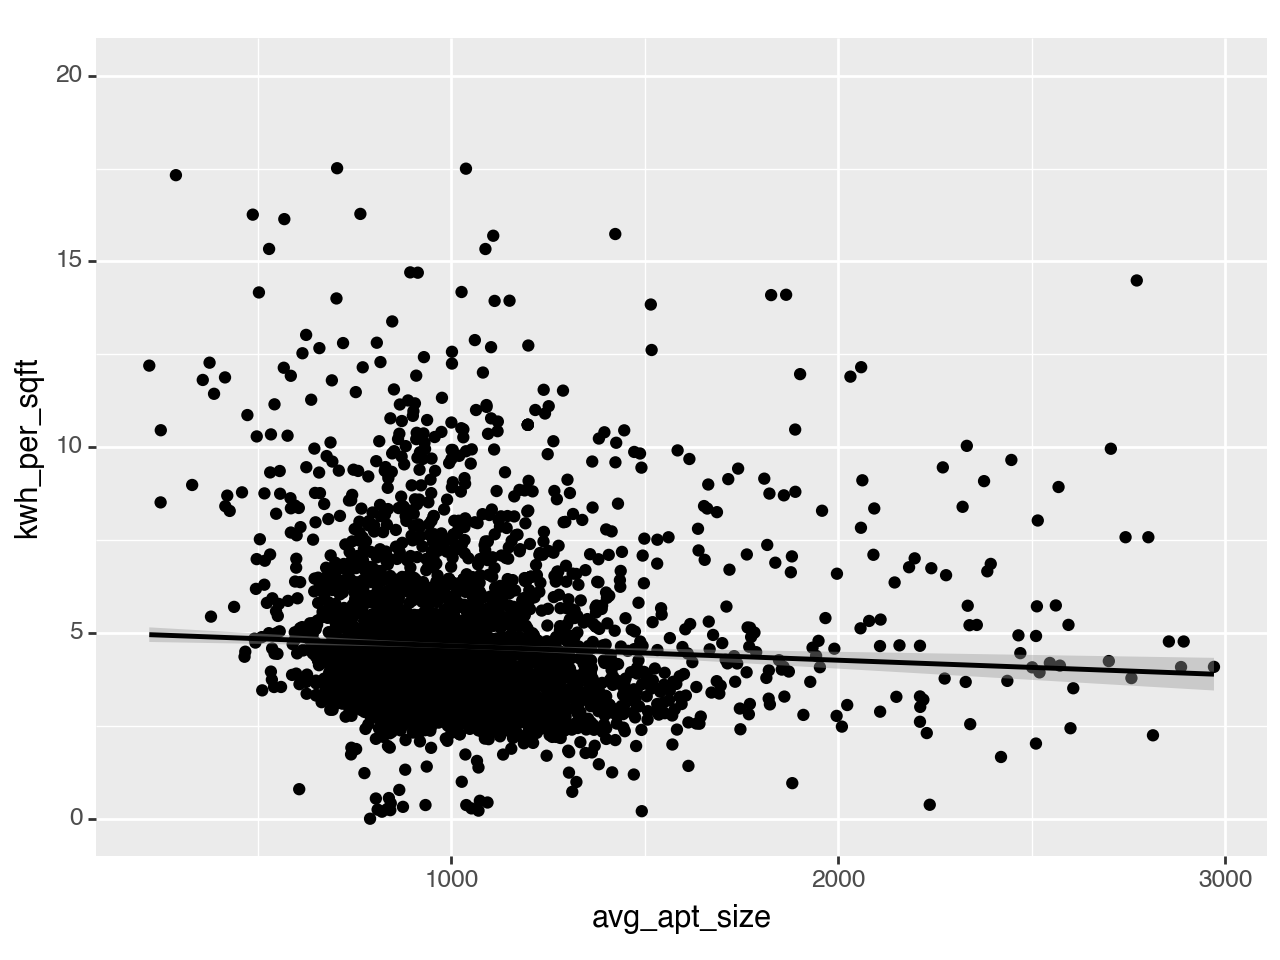

<Figure Size: (640 x 480)>

In [114]:
(ggplot(ghg.query("inferred_heating_method == 'Natural Gas' & kwh_per_sqft < 20 & avg_apt_size < 3000 & laundry_cat == 'None'"), aes(y = "kwh_per_sqft", x = "avg_apt_size")) + geom_point()) + ylim(0, 20) + geom_smooth()

In [115]:
unadjusted = smf.ols("kwh_per_sqft ~ avg_apt_size", data = mod_ghg.query("inferred_heating_method != 'Electricty'")).fit()
unadjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           kwh_per_sqft   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     112.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.44e-26
Time:                        20:51:35   Log-Likelihood:                -44776.
No. Observations:               16540   AIC:                         8.956e+04
Df Residuals:                   16538   BIC:                         8.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8537      0.049     98.130      0.000       4.757       4.951
avg_apt_size     0.0004    3.4e-05     10.605      0.000       0.000       0.000
==============================================================================
Omnibus:                    32076.442   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        167342688.457
Skew:                          14.937   Prob(JB):                         0.00
Kurtosis:                     494.860   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
adjusted = smf.logit("bottom_quint ~ water_per_sqft", data = mod_ghg).fit()
adjusted.summary()

Optimization terminated successfully.
         Current function value: 0.468100
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           bottom_quint   No. Observations:                12472
Model:                          Logit   Df Residuals:                    12470
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Mar 2024   Pseudo R-squ.:                0.003390
Time:                        20:53:44   Log-Likelihood:                -5838.1
converged:                       True   LL-Null:                       -5858.0
Covariance Type:            nonrobust   LLR p-value:                 2.940e-10
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5857      0.028    -57.018      0.000      -1.640      -1.531
water_per_sqft     0.0008      0.000      3.929      0.000       0.000       0.001
==================================================================================
"""

In [147]:
mod_ghg.name

0          1870 Pelham Parkway South
1           MMD: 2015 ST PAUL AVENUE
2              Hamdi: 3110 Wilkinson
4               2965 East 196 Street
5            2025 Continental Avenue
                    ...             
17153              Plaza Owners Inc.
17154    Elijah Smith Senior Citizen
17155               6901 62nd Street
17156               6930 62nd Street
17157                666 Hancock St.
Name: name, Length: 16540, dtype: object

In [127]:
mod_ghg.electricity_energy_pct

0        0.530560
1        0.169479
2        0.126595
4        0.137532
5        0.210682
           ...   
17153    0.135450
17154    0.203352
17155    0.099163
17156    0.114402
17157    0.129986
Name: electricity_energy_pct, Length: 16540, dtype: float64

In [134]:
adjusted = smf.ols("kwh_per_sqft ~ apt_size_cat + laundry_cat", data = mod_ghg.query("electricity_energy_pct > .9 & laundry_cat != 'Unknown'")).fit()
adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           kwh_per_sqft   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.031
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           0.000648
Time:                        21:00:02   Log-Likelihood:                -1050.0
No. Observations:                 341   AIC:                             2114.
Df Residuals:                     334   BIC:                             2141.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.2089      0.963     10.606      0.000       8.316      12.102
apt_size_cat[T.750 - 1000]     -1.1247      1.045     -1.076      0.282      -3.180       0.931
apt_size_cat[T.1000 - 1250]    -3.2427      1.105     -2.935      0.004      -5.416      -1.069
apt_size_cat[T.1250 - 2000]    -3.2615      1.156     -2.822      0.005      -5.535      -0.988
apt_size_cat[T.2000 +]         -2.8255      1.315     -2.148      0.032      -5.412      -0.239
laundry_cat[T.In-unit]          0.5886      0.834      0.706      0.481      -1.051       2.229
laundry_cat[T.None]            -1.5604      0.664     -2.349      0.019      -2.867      -0.254
==============================================================================
Omnibus:                      290.155   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7366.979
Skew:                           3.391   Prob(JB):                         0.00
Kurtosis:                      24.737   Cond. No.                         9.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
adjusted = smf.logit("bottom_quint ~ apt_size_cat + income_bin + inferred_heating_method + laundry_cat + decade_built", data = mod_ghg).fit()
adjusted.summary()

Optimization terminated successfully.
         Current function value: 0.384230
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           bottom_quint   No. Observations:                16540
Model:                          Logit   Df Residuals:                    16523
Method:                           MLE   Df Model:                           16
Date:                Tue, 19 Mar 2024   Pseudo R-squ.:                  0.2065
Time:                        20:54:30   Log-Likelihood:                -6355.2
converged:                       True   LL-Null:                       -8009.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     9.3466      1.623      5.759      0.000       6.165      12.528
apt_size_cat[T.750 - 1000]                   -0.8606      0.067    -12.866      0.000      -0.992      -0.729
apt_size_cat[T.1000 - 1250]                  -1.5662      0.074    -21.050      0.000      -1.712      -1.420
apt_size_cat[T.1250 - 2000]                  -2.1353      0.098    -21.732      0.000      -2.328      -1.943
apt_size_cat[T.2000 +]                       -1.8351      0.141    -13.052      0.000      -2.111      -1.560
income_bin[T.30k-75k]                        -0.5728      0.070     -8.155      0.000      -0.710      -0.435
income_bin[T.75k-125k]                       -0.8570      0.083    -10.372      0.000      -1.019      -0.695
income_bin[T.125k-175k]                      -1.2326      0.101    -12.145      0.000      -1.431      -1.034
income_bin[T.175k+]                          -1.3548      0.152     -8.890      0.000      -1.653      -1.056
inferred_heating_method[T.Natural Gas]        2.0697      0.183     11.330      0.000       1.712       2.428
inferred_heating_method[T.District Steam]     3.2185      0.249     12.900      0.000       2.730       3.708
inferred_heating_method[T.Fuel Oil]           4.2636      0.189     22.583      0.000       3.894       4.634
inferred_heating_method[T.Unknown]            0.4339      0.303      1.434      0.152      -0.159       1.027
laundry_cat[T.In-unit]                        0.1956      0.120      1.635      0.102      -0.039       0.430
laundry_cat[T.None]                           0.3151      0.060      5.246      0.000       0.197       0.433
laundry_cat[T.Unknown]                        0.3997      0.058      6.938      0.000       0.287       0.513
decade_built                                 -0.0060      0.001     -7.276      0.000      -0.008      -0.004
=============================================================================================================
"""

In [59]:
unadjusted = smf.ols("co2_intensity ~ avg_apt_size", data = mod_ghg).fit()
unadjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_intensity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     30.10
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.16e-08
Time:                        19:15:39   Log-Likelihood:                -54907.
No. Observations:               16540   AIC:                         1.098e+05
Df Residuals:                   16538   BIC:                         1.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.4723      0.091     59.962      0.000       5.293       5.651
avg_apt_size    -0.0003   6.27e-05     -5.487      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    66569.156   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     106121712128.517
Skew:                         103.968   Prob(JB):                         0.00
Kurtosis:                   12410.349   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
unadjusted = smf.ols("co2_intensity ~ apt_size_cat", data = mod_ghg).fit()
unadjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_intensity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.20
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.30e-16
Time:                        19:17:12   Log-Likelihood:                -54882.
No. Observations:               16540   AIC:                         1.098e+05
Df Residuals:                   16535   BIC:                         1.098e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.0296      0.167     36.086      0.000       5.702       6.357
apt_size_cat[T.750 - 1000]     -0.6901      0.187     -3.689      0.000      -1.057      -0.323
apt_size_cat[T.1000 - 1250]    -1.1992      0.193     -6.215      0.000      -1.577      -0.821
apt_size_cat[T.1250 - 2000]    -1.4364      0.212     -6.780      0.000      -1.852      -1.021
apt_size_cat[T.2000 +]         -1.7778      0.255     -6.968      0.000      -2.278      -1.278
==============================================================================
Omnibus:                    66694.007   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     107844976304.225
Skew:                         104.591   Prob(JB):                         0.00
Kurtosis:                   12510.690   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
adjusted = smf.ols("co2_intensity ~ avg_apt_size + med_hh_inc", data = mod_ghg).fit()
adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_intensity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.35
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.02e-09
Time:                        19:15:40   Log-Likelihood:                -54903.
No. Observations:               16540   AIC:                         1.098e+05
Df Residuals:                   16537   BIC:                         1.098e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6518      0.110     51.434      0.000       5.436       5.867
avg_apt_size    -0.0003   6.69e-05     -4.118      0.000      -0.000      -0.000
med_hh_inc   -3.284e-06   1.12e-06     -2.931      0.003   -5.48e-06   -1.09e-06
==============================================================================
Omnibus:                    66582.822   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     106312289999.909
Skew:                         104.036   Prob(JB):                         0.00
Kurtosis:                   12421.486   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
unadjusted = smf.ols("co2_intensity ~ apt_size_cat + med_hh_inc + inferred_heating_method + laundry_cat + decade_built", data = mod_ghg).fit()
unadjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_intensity   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     40.64
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          7.51e-103
Time:                        19:16:43   Log-Likelihood:                -54662.
No. Observations:               16540   AIC:                         1.094e+05
Df Residuals:                   16526   BIC:                         1.095e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     8.6658      3.241      2.674      0.008       2.313      15.018
apt_size_cat[T.750 - 1000]                   -0.7211      0.185     -3.896      0.000      -1.084      -0.358
apt_size_cat[T.1000 - 1250]                  -1.1937      0.191     -6.246      0.000      -1.568      -0.819
apt_size_cat[T.1250 - 2000]                  -1.2944      0.212     -6.113      0.000      -1.709      -0.879
apt_size_cat[T.2000 +]                       -1.4354      0.276     -5.199      0.000      -1.976      -0.894
inferred_heating_method[T.Natural Gas]        2.7771      0.187     14.865      0.000       2.411       3.143
inferred_heating_method[T.District Steam]     3.4993      0.434      8.057      0.000       2.648       4.351
inferred_heating_method[T.Fuel Oil]           4.4402      0.234     18.987      0.000       3.982       4.899
inferred_heating_method[T.Unknown]            0.9909      0.321      3.088      0.002       0.362       1.620
laundry_cat[T.In-unit]                        0.0981      0.220      0.446      0.655      -0.333       0.529
laundry_cat[T.None]                           0.0824      0.137      0.603      0.546      -0.185       0.350
laundry_cat[T.Unknown]                        0.1436      0.129      1.110      0.267      -0.110       0.397
med_hh_inc                                -3.354e-06   1.21e-06     -2.775      0.006   -5.72e-06   -9.85e-07
decade_built                                 -0.0027      0.002     -1.614      0.106      -0.006       0.001
==============================================================================
Omnibus:                    67526.620   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     119883475669.382
Skew:                         108.834   Prob(JB):                         0.00
Kurtosis:                   13190.376   Cond. No.                     5.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
pluto = pd.read_csv("https://data.cityofnewyork.us/api/views/64uk-42ks/rows.csv?date=20231212&accessType=DOWNLOAD")


/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_16975/2389386961.py:1: DtypeWarning: Columns (17,18,20,21,22,24,25,52,61,62,79,97) have mixed types. Specify dtype option on import or set low_memory=False.


In [87]:
pluto.bldgarea.sum()

5673667730.0

In [88]:
pluto.query("bldgarea > 25000").bldgarea.sum()

3453664700.0

In [89]:
3453664700.0 / 5673667730.0

0.6087181809640446